# CA 2 Capstone Report

|  |  |
| --- | --- |
| Student Full Name | Swan Saung Lwin |
| Student Number | 2025282 ||
| Module Title | Strategic Thinking |
| Assessment Title | CA 2 Capstone Report |
| Assessment Due Date | 18th May 2025 |
| Date of Submission | 18th May 2025 |

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Demographics

In [5]:
df_demo = pd.read_csv("data/Telco_customer_churn_demographics.csv")

In [6]:
df_demo.head()

Customer ID  Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV      1    Male   78       No            Yes      No         No   
1  7495-OOKFY      1  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY      1    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ      1  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ      1  Female   80       No            Yes     Yes        Yes   

   Number of Dependents  
0                     0  
1                     1  
2                     3  
3                     1  
4                     1

In [7]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [8]:
df_demo.describe()

Count          Age  Number of Dependents
count  7043.0  7043.000000           7043.000000
mean      1.0    46.509726              0.468692
std       0.0    16.750352              0.962802
min       1.0    19.000000              0.000000
25%       1.0    32.000000              0.000000
50%       1.0    46.000000              0.000000
75%       1.0    60.000000              0.000000
max       1.0    80.000000              9.000000

In [9]:
df_demo.drop(columns=["Count", "Under 30", "Dependents"], inplace=True)

In [10]:
df_demo.head()

Customer ID  Gender  Age Senior Citizen Married  Number of Dependents
0  8779-QRDMV    Male   78            Yes      No                     0
1  7495-OOKFY  Female   74            Yes     Yes                     1
2  1658-BYGOY    Male   71            Yes      No                     3
3  4598-XLKNJ  Female   78            Yes     Yes                     1
4  4846-WHAFZ  Female   80            Yes     Yes                     1

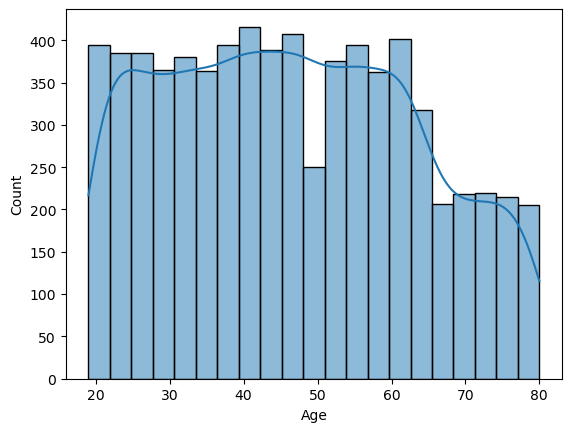

In [11]:
# Age distribution

sns.histplot(x=df_demo["Age"], kde=True)
plt.show()

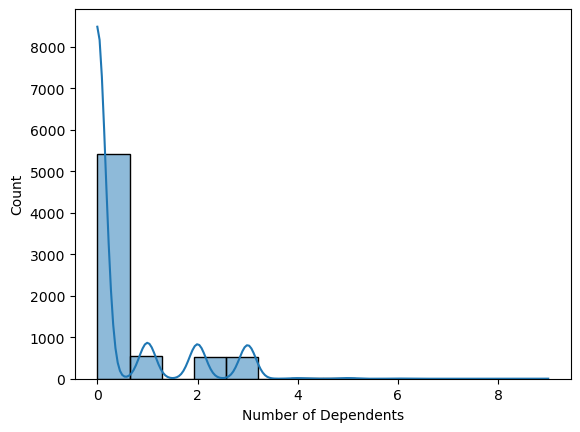

In [12]:
# Dependents distribution

sns.histplot(x=df_demo["Number of Dependents"], kde=True)
plt.savefig("images/number-of-dependents-distplot", bbox_inches = 'tight')
plt.show()

In [13]:
df_demo["Number of Dependents"].value_counts()

Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: count, dtype: int64

In [14]:
# Function for Dependents Discretization
def dependents_discretization(value):
    if value > 3:
        return 3
    return value

# Dependents Discretization
df_demo['Dependents'] = df_demo['Number of Dependents'].apply(dependents_discretization)

In [15]:
df_demo["Dependents"].unique()

array([0, 1, 3, 2])

In [16]:
df_demo.drop(columns=["Number of Dependents"], inplace=True)

In [17]:
df_demo.head()

Customer ID  Gender  Age Senior Citizen Married  Dependents
0  8779-QRDMV    Male   78            Yes      No           0
1  7495-OOKFY  Female   74            Yes     Yes           1
2  1658-BYGOY    Male   71            Yes      No           3
3  4598-XLKNJ  Female   78            Yes     Yes           1
4  4846-WHAFZ  Female   80            Yes     Yes           1

In [18]:
df_demo.dtypes

Customer ID       object
Gender            object
Age                int64
Senior Citizen    object
Married           object
Dependents         int64
dtype: object

In [19]:
df_demo["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
# Male vs Female

male_female = df_demo["Gender"].value_counts()
male_count = male_female.loc["Male"]
female_count = male_female.loc["Female"]
male_ratio, female_ratio = male_count/ df_demo.shape[0], female_count/df_demo.shape[0]

male_vs_female = pd.DataFrame(
    data=[[male_count, male_ratio], [female_count, female_ratio]], 
    index=["Male", "Female"], 
    columns=["Count", "Ratio"]
)
male_vs_female

Count     Ratio
Male     3555  0.504756
Female   3488  0.495244

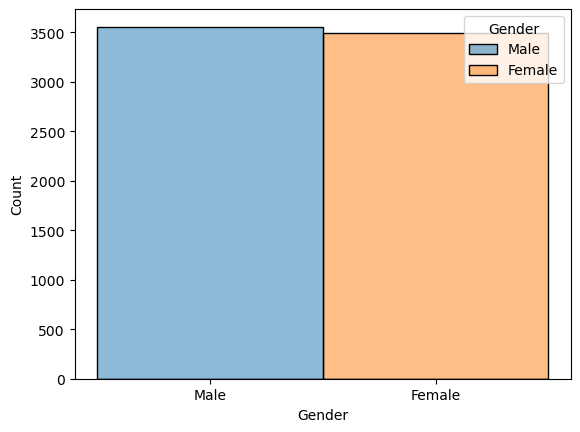

In [21]:
# Male vs Female

sns.histplot(x=df_demo["Gender"], hue=df_demo["Gender"])
plt.savefig("images/gender-ratio", bbox_inches = 'tight')
plt.show()

In [22]:
# convert Yes/No to 1/0

def yes_no_transformer(series: pd.Series):
    '''Transform Yes/No values in Series to 1/0'''
    return series.replace({"Yes": 1, "No": 0})

In [23]:
df_demo = df_demo.apply(yes_no_transformer)

In [24]:
df_demo.dtypes

Customer ID       object
Gender            object
Age                int64
Senior Citizen     int64
Married            int64
Dependents         int64
dtype: object

In [25]:
df_demo.head()

Customer ID  Gender  Age  Senior Citizen  Married  Dependents
0  8779-QRDMV    Male   78               1        0           0
1  7495-OOKFY  Female   74               1        1           1
2  1658-BYGOY    Male   71               1        0           3
3  4598-XLKNJ  Female   78               1        1           1
4  4846-WHAFZ  Female   80               1        1           1

In [26]:
df_demo.isnull().sum()

Customer ID       0
Gender            0
Age               0
Senior Citizen    0
Married           0
Dependents        0
dtype: int64

In [27]:
df_demo.duplicated().sum()

0

# Location

In [29]:
df_location = pd.read_csv("data/Telco_customer_churn_location.csv")

In [30]:
df_location.head()

Location ID Customer ID  Count        Country       State         City  \
0  OXCZEW7397  8779-QRDMV      1  United States  California  Los Angeles   
1  FCCECI8494  7495-OOKFY      1  United States  California  Los Angeles   
2  HEHUQY7254  1658-BYGOY      1  United States  California  Los Angeles   
3  WIUHRF2613  4598-XLKNJ      1  United States  California    Inglewood   
4  CFEZBF4415  4846-WHAFZ      1  United States  California     Whittier   

   Zip Code                Lat Long   Latitude   Longitude  
0     90022   34.02381, -118.156582  34.023810 -118.156582  
1     90063  34.044271, -118.185237  34.044271 -118.185237  
2     90065  34.108833, -118.229715  34.108833 -118.229715  
3     90303  33.936291, -118.332639  33.936291 -118.332639  
4     90602  33.972119, -118.020188  33.972119 -118.020188

In [31]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location ID  7043 non-null   object 
 1   Customer ID  7043 non-null   object 
 2   Count        7043 non-null   int64  
 3   Country      7043 non-null   object 
 4   State        7043 non-null   object 
 5   City         7043 non-null   object 
 6   Zip Code     7043 non-null   int64  
 7   Lat Long     7043 non-null   object 
 8   Latitude     7043 non-null   float64
 9   Longitude    7043 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 550.4+ KB


In [32]:
df_location.describe()

Count      Zip Code     Latitude    Longitude
count  7043.0   7043.000000  7043.000000  7043.000000
mean      1.0  93486.071134    36.197455  -119.756684
std       0.0   1856.768045     2.468929     2.154425
min       1.0  90001.000000    32.555828  -124.301372
25%       1.0  92101.000000    33.990646  -121.788090
50%       1.0  93518.000000    36.205465  -119.595293
75%       1.0  95329.000000    38.161321  -117.969795
max       1.0  96150.000000    41.962127  -114.192901

In [33]:
df_location["Country"].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [34]:
df_location["Count"].value_counts()

Count
1    7043
Name: count, dtype: int64

In [35]:
df_location["State"].value_counts()

State
California    7043
Name: count, dtype: int64

In [36]:
df_location["Zip Code"].value_counts()

Zip Code
92028    43
92027    38
92122    36
92117    34
92126    32
         ..
95431     2
91934     2
92105     2
92250     2
93711     1
Name: count, Length: 1625, dtype: int64

In [37]:
df_location["City"].value_counts()

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64

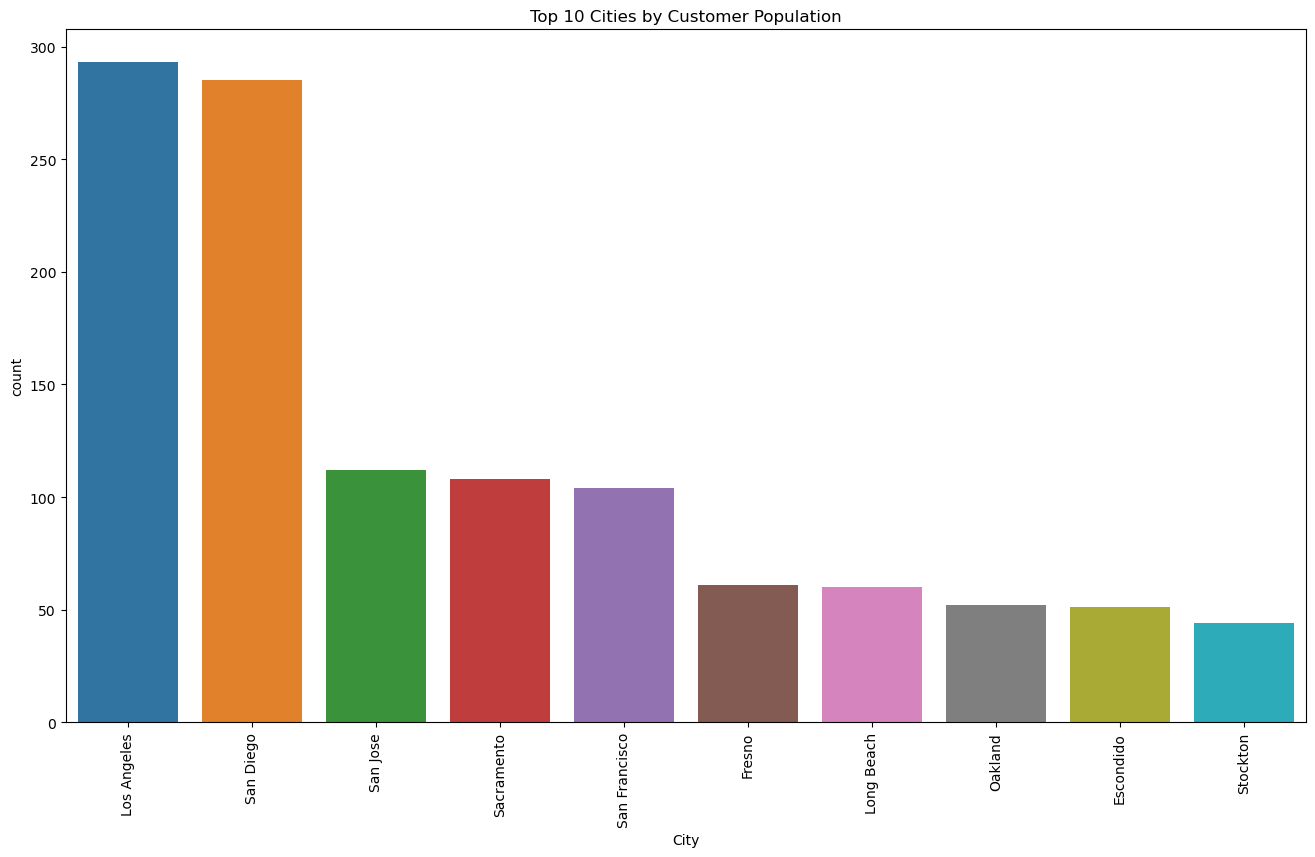

In [38]:
# Top 10 city by customer population

top10_city = df_location["City"].value_counts().iloc[:10]
plt.figure(figsize=(16,9))
sns.barplot(x=top10_city.index, y=top10_city, hue=top10_city.index)
plt.title("Top 10 Cities by Customer Population")
plt.xticks(rotation=90)
plt.savefig("images/top10-cities", bbox_inches = 'tight')
plt.show()

In [39]:
df_location = df_location[["Customer ID", "City", "Zip Code"]]

In [40]:
df_location.head()

Customer ID         City  Zip Code
0  8779-QRDMV  Los Angeles     90022
1  7495-OOKFY  Los Angeles     90063
2  1658-BYGOY  Los Angeles     90065
3  4598-XLKNJ    Inglewood     90303
4  4846-WHAFZ     Whittier     90602

In [41]:
df_location.isnull().sum()

Customer ID    0
City           0
Zip Code       0
dtype: int64

In [42]:
df_location.duplicated().sum()

0

# Populations

In [44]:
df_population = pd.read_csv("data/Telco_customer_churn_population.csv")

In [45]:
df_population.head()

ID  Zip Code Population
0   1     90001     54,492
1   2     90002     44,586
2   3     90003     58,198
3   4     90004     67,852
4   5     90005     43,019

In [46]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1671 non-null   int64 
 1   Zip Code    1671 non-null   int64 
 2   Population  1671 non-null   object
dtypes: int64(2), object(1)
memory usage: 39.3+ KB


In [47]:
df_population.drop(columns=["ID"], inplace=True)

In [48]:
df_population.head()

Zip Code Population
0     90001     54,492
1     90002     44,586
2     90003     58,198
3     90004     67,852
4     90005     43,019

In [49]:
import re

def transform_population(value):
    '''Transform population string to int'''
    stripped_string = re.sub(r'[^0-9]', '', value)
    return int(stripped_string)

In [50]:
df_population["Population"] = df_population["Population"].apply(transform_population)

In [51]:
df_population.head()

Zip Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852
4     90005       43019

In [52]:
df_population.dtypes

Zip Code      int64
Population    int64
dtype: object

In [53]:
df_population.describe()

Zip Code     Population
count   1671.000000    1671.000000
mean   93678.992220   20276.384201
std     1817.763591   20689.117300
min    90001.000000      11.000000
25%    92269.000000    1789.000000
50%    93664.000000   14239.000000
75%    95408.000000   32942.500000
max    96161.000000  105285.000000

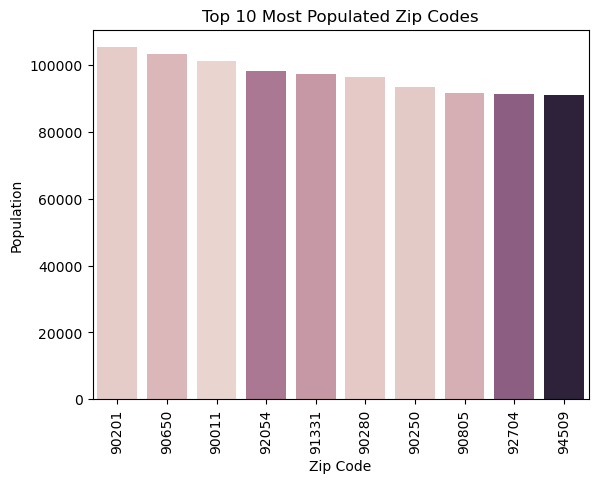

In [54]:
# Top 10 most-populated zip codes

top10_most_zipcode = df_population[["Zip Code", "Population"]].sort_values(
    by="Population", 
    ascending=False
).iloc[:10]

sns.barplot(
    x=top10_most_zipcode["Zip Code"], 
    y=top10_most_zipcode["Population"], 
    hue=top10_most_zipcode["Zip Code"], 
    order=top10_most_zipcode["Zip Code"], 
    legend=False
)
plt.title("Top 10 Most Populated Zip Codes")
plt.xticks(rotation=90)
plt.show()

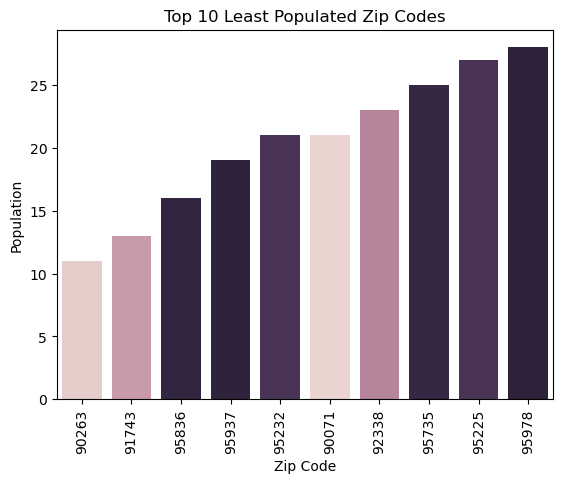

In [55]:
# Top 10 least-populated zip codes

top10_least_zipcode = df_population[["Zip Code", "Population"]].sort_values(
    by="Population", 
    ascending=True
).iloc[:10]

sns.barplot(
    x=top10_least_zipcode["Zip Code"], 
    y=top10_least_zipcode["Population"], 
    hue=top10_least_zipcode["Zip Code"], 
    order=top10_least_zipcode["Zip Code"], 
    legend=False
)
plt.title("Top 10 Least Populated Zip Codes")
plt.xticks(rotation=90)
plt.show()

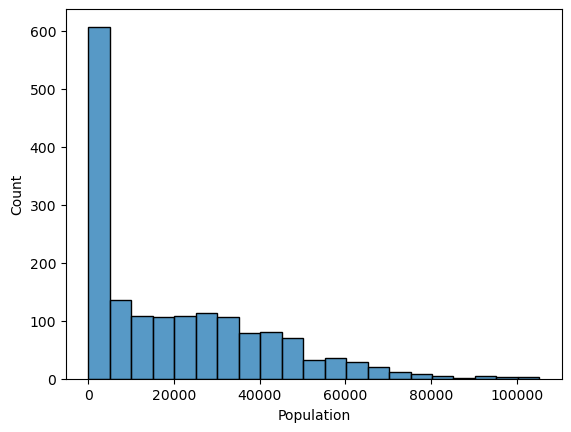

In [56]:
sns.histplot(x=df_population["Population"])
plt.savefig("images/population-distplot", bbox_inches = 'tight')
plt.show()

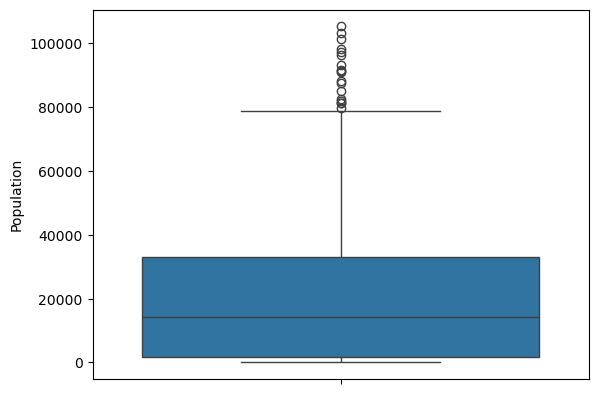

In [57]:
sns.boxplot(y=df_population["Population"])
plt.savefig("images/population-boxplot", bbox_inches = 'tight')
plt.show()

In [58]:
df_population.isnull().sum()

Zip Code      0
Population    0
dtype: int64

In [59]:
df_population.duplicated().sum()

0

# Services

In [61]:
df_services = pd.read_csv("data/Telco_customer_churn_services.csv")

In [62]:
df_services.head()

Service ID Customer ID  Count Quarter Referred a Friend  \
0  IJKDQVSWH3522  8779-QRDMV      1      Q3                No   
1  BFKMZJAIE2285  7495-OOKFY      1      Q3               Yes   
2  EIMVJQBMT7187  1658-BYGOY      1      Q3                No   
3  EROZQXDUU4979  4598-XLKNJ      1      Q3               Yes   
4  GEEYSJUHY6991  4846-WHAFZ      1      Q3               Yes   

   Number of Referrals  Tenure in Months    Offer Phone Service  \
0                    0                 1      NaN            No   
1                    1                 8  Offer E           Yes   
2                    0                18  Offer D           Yes   
3                    1                25  Offer C           Yes   
4                    1                37  Offer C           Yes   

   Avg Monthly Long Distance Charges  ... Unlimited Data        Contract  \
0                               0.00  ...             No  Month-to-Month   
1                              48.85  ...            Yes  Month-to-Month   
2                              11.33  ...            Yes  Month-to-Month   
3                              19.76  ...            Yes  Month-to-Month   
4                               6.33  ...            Yes  Month-to-Month   

  Paperless Billing   Payment Method Monthly Charge Total Charges  \
0               Yes  Bank Withdrawal          39.65         39.65   
1               Yes      Credit Card          80.65        633.30   
2               Yes  Bank Withdrawal          95.45       1752.55   
3               Yes  Bank Withdrawal          98.50       2514.50   
4               Yes  Bank Withdrawal          76.50       2868.15   

  Total Refunds Total Extra Data Charges Total Long Distance Charges  \
0          0.00                       20                        0.00   
1          0.00                        0                      390.80   
2         45.61                        0                      203.94   
3         13.43                        0                      494.00   
4          0.00                        0                      234.21   

  Total Revenue  
0         59.65  
1       1024.10  
2       1910.88  
3       2995.07  
4       3102.36  

[5 rows x 31 columns]

In [63]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Service ID                         7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Count                              7043 non-null   int64  
 3   Quarter                            7043 non-null   object 
 4   Referred a Friend                  7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [64]:
df_services.describe()

Count  Number of Referrals  Tenure in Months  \
count  7043.0          7043.000000       7043.000000   
mean      1.0             1.951867         32.386767   
std       0.0             3.001199         24.542061   
min       1.0             0.000000          1.000000   
25%       1.0             0.000000          9.000000   
50%       1.0             0.000000         29.000000   
75%       1.0             3.000000         55.000000   
max       1.0            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        64.761692    2280.381264       1.962182                  6.860713   
std         30.090047    2266.220462       7.902614                 25.104978   
min         18.250000      18.800000       0.000000                  0.000000   
25%         35.500000     400.150000       0.000000                  0.000000   
50%         70.350000    1394.550000       0.000000                  0.000000   
75%         89.850000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [65]:
df_services["Offer"].unique()

array([nan, 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [66]:
df_services.drop(columns=["Offer"], inplace=True)

In [67]:
df_services[["Internet Service", "Internet Type"]]

Internet Service Internet Type
0                 Yes           DSL
1                 Yes   Fiber Optic
2                 Yes   Fiber Optic
3                 Yes   Fiber Optic
4                 Yes   Fiber Optic
...               ...           ...
7038               No           NaN
7039              Yes         Cable
7040              Yes   Fiber Optic
7041              Yes           DSL
7042              Yes   Fiber Optic

[7043 rows x 2 columns]

In [68]:
df_services["Internet Type"] = df_services["Internet Type"].fillna("None")

In [69]:
df_services["Internet Type"].isnull().sum()

0

In [70]:
# drop redudant columns

df_services.drop(columns=["Service ID", "Count", "Referred a Friend", "Internet Service"], inplace=True)

In [71]:
df_services.head()

Customer ID Quarter  Number of Referrals  Tenure in Months Phone Service  \
0  8779-QRDMV      Q3                    0                 1            No   
1  7495-OOKFY      Q3                    1                 8           Yes   
2  1658-BYGOY      Q3                    0                18           Yes   
3  4598-XLKNJ      Q3                    1                25           Yes   
4  4846-WHAFZ      Q3                    1                37           Yes   

   Avg Monthly Long Distance Charges Multiple Lines Internet Type  \
0                               0.00             No           DSL   
1                              48.85            Yes   Fiber Optic   
2                              11.33            Yes   Fiber Optic   
3                              19.76             No   Fiber Optic   
4                               6.33            Yes   Fiber Optic   

   Avg Monthly GB Download Online Security  ... Unlimited Data  \
0                        8              No  ...             No   
1                       17              No  ...            Yes   
2                       52              No  ...            Yes   
3                       12              No  ...            Yes   
4                       14              No  ...            Yes   

         Contract Paperless Billing   Payment Method Monthly Charge  \
0  Month-to-Month               Yes  Bank Withdrawal          39.65   
1  Month-to-Month               Yes      Credit Card          80.65   
2  Month-to-Month               Yes  Bank Withdrawal          95.45   
3  Month-to-Month               Yes  Bank Withdrawal          98.50   
4  Month-to-Month               Yes  Bank Withdrawal          76.50   

  Total Charges Total Refunds Total Extra Data Charges  \
0         39.65          0.00                       20   
1        633.30          0.00                        0   
2       1752.55         45.61                        0   
3       2514.50         13.43                        0   
4       2868.15          0.00                        0   

  Total Long Distance Charges Total Revenue  
0                        0.00         59.65  
1                      390.80       1024.10  
2                      203.94       1910.88  
3                      494.00       2995.07  
4                      234.21       3102.36  

[5 rows x 26 columns]

In [72]:
# find single value columns

single_value_columns = [col for col in df_services.columns.tolist() if len(df_services[col].unique()) == 1]
single_value_columns

['Quarter']

In [73]:
df_services.drop(columns=["Quarter"], inplace=True)

In [74]:
df_services.head()

Customer ID  Number of Referrals  Tenure in Months Phone Service  \
0  8779-QRDMV                    0                 1            No   
1  7495-OOKFY                    1                 8           Yes   
2  1658-BYGOY                    0                18           Yes   
3  4598-XLKNJ                    1                25           Yes   
4  4846-WHAFZ                    1                37           Yes   

   Avg Monthly Long Distance Charges Multiple Lines Internet Type  \
0                               0.00             No           DSL   
1                              48.85            Yes   Fiber Optic   
2                              11.33            Yes   Fiber Optic   
3                              19.76             No   Fiber Optic   
4                               6.33            Yes   Fiber Optic   

   Avg Monthly GB Download Online Security Online Backup  ... Unlimited Data  \
0                        8              No            No  ...             No   
1                       17              No           Yes  ...            Yes   
2                       52              No            No  ...            Yes   
3                       12              No           Yes  ...            Yes   
4                       14              No            No  ...            Yes   

         Contract Paperless Billing   Payment Method Monthly Charge  \
0  Month-to-Month               Yes  Bank Withdrawal          39.65   
1  Month-to-Month               Yes      Credit Card          80.65   
2  Month-to-Month               Yes  Bank Withdrawal          95.45   
3  Month-to-Month               Yes  Bank Withdrawal          98.50   
4  Month-to-Month               Yes  Bank Withdrawal          76.50   

  Total Charges Total Refunds Total Extra Data Charges  \
0         39.65          0.00                       20   
1        633.30          0.00                        0   
2       1752.55         45.61                        0   
3       2514.50         13.43                        0   
4       2868.15          0.00                        0   

  Total Long Distance Charges  Total Revenue  
0                        0.00          59.65  
1                      390.80        1024.10  
2                      203.94        1910.88  
3                      494.00        2995.07  
4                      234.21        3102.36  

[5 rows x 25 columns]

In [75]:
yes_no_columns = [col for col in df_services.columns.tolist() if set(df_services[col].unique()) =={"No", "Yes"}]
yes_no_columns

['Phone Service',
 'Multiple Lines',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Paperless Billing']

In [76]:
yes_no_colums_values = [df_services[col].value_counts().sort_index() for col in yes_no_columns]
yes_no_colums_values

[Phone Service
 No      682
 Yes    6361
 Name: count, dtype: int64,
 Multiple Lines
 No     4072
 Yes    2971
 Name: count, dtype: int64,
 Online Security
 No     5024
 Yes    2019
 Name: count, dtype: int64,
 Online Backup
 No     4614
 Yes    2429
 Name: count, dtype: int64,
 Device Protection Plan
 No     4621
 Yes    2422
 Name: count, dtype: int64,
 Premium Tech Support
 No     4999
 Yes    2044
 Name: count, dtype: int64,
 Streaming TV
 No     4336
 Yes    2707
 Name: count, dtype: int64,
 Streaming Movies
 No     4311
 Yes    2732
 Name: count, dtype: int64,
 Streaming Music
 No     4555
 Yes    2488
 Name: count, dtype: int64,
 Unlimited Data
 No     2298
 Yes    4745
 Name: count, dtype: int64,
 Paperless Billing
 No     2872
 Yes    4171
 Name: count, dtype: int64]

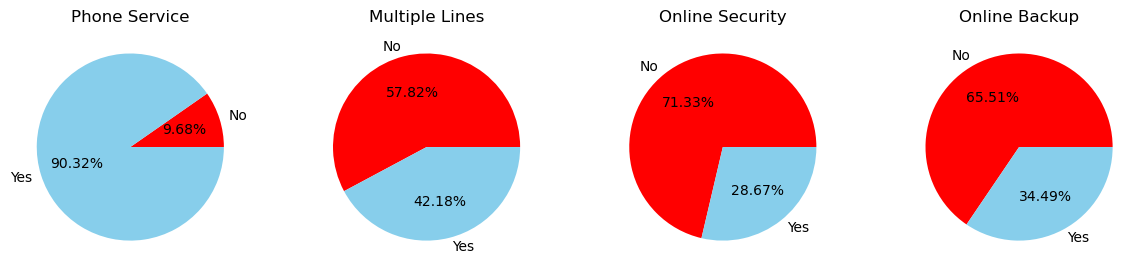

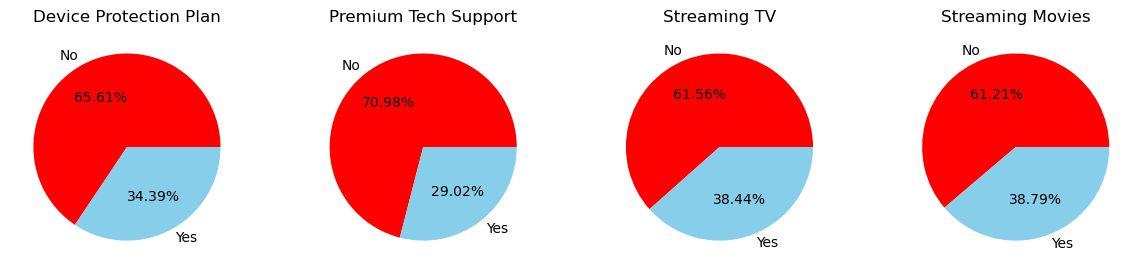

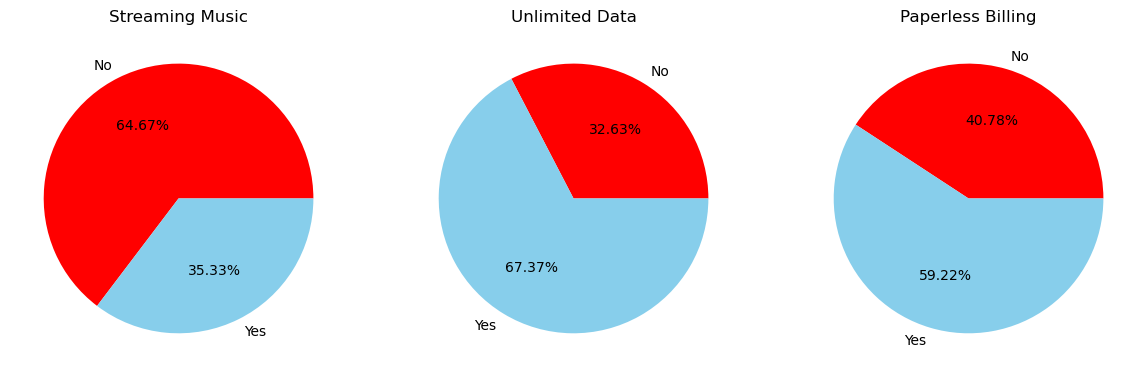

In [77]:
# Comparsion of Service Usage

col_names_divided = [yes_no_columns[:4], yes_no_columns[4:8], yes_no_columns[8:]]
col_values_divided = [yes_no_colums_values[:4], yes_no_colums_values[4:8], yes_no_colums_values[8:]]

for i in range(3):
    n = 4
    if i == 2:
        n = 3
    fig, axes = plt.subplots(1, n)
    fig.set_size_inches(12, 6)
    fig.tight_layout()
    for column_name, column_value, ax in zip(col_names_divided[i],col_values_divided[i], axes.flatten()):
        ax.set_title(column_name)
        ax.pie(data=df_services, x=column_value, labels=["No", "Yes"],
            autopct=lambda percent: "{:.2f}%".format(percent),
            colors=["red","skyblue"])
    fig.savefig(f"images/services-piechart{i}", bbox_inches = 'tight')

In [78]:
def count_service_usage(row):
    usage = 0
    for value in row:
        if value == "Yes":
            usage += 1
    return usage

df_services["Number of Services Used"] = df_services[yes_no_columns].apply(count_service_usage, axis=1)

In [79]:
df_services.head()

Customer ID  Number of Referrals  Tenure in Months Phone Service  \
0  8779-QRDMV                    0                 1            No   
1  7495-OOKFY                    1                 8           Yes   
2  1658-BYGOY                    0                18           Yes   
3  4598-XLKNJ                    1                25           Yes   
4  4846-WHAFZ                    1                37           Yes   

   Avg Monthly Long Distance Charges Multiple Lines Internet Type  \
0                               0.00             No           DSL   
1                              48.85            Yes   Fiber Optic   
2                              11.33            Yes   Fiber Optic   
3                              19.76             No   Fiber Optic   
4                               6.33            Yes   Fiber Optic   

   Avg Monthly GB Download Online Security Online Backup  ...        Contract  \
0                        8              No            No  ...  Month-to-Month   
1                       17              No           Yes  ...  Month-to-Month   
2                       52              No            No  ...  Month-to-Month   
3                       12              No           Yes  ...  Month-to-Month   
4                       14              No            No  ...  Month-to-Month   

  Paperless Billing   Payment Method Monthly Charge Total Charges  \
0               Yes  Bank Withdrawal          39.65         39.65   
1               Yes      Credit Card          80.65        633.30   
2               Yes  Bank Withdrawal          95.45       1752.55   
3               Yes  Bank Withdrawal          98.50       2514.50   
4               Yes  Bank Withdrawal          76.50       2868.15   

  Total Refunds Total Extra Data Charges Total Long Distance Charges  \
0          0.00                       20                        0.00   
1          0.00                        0                      390.80   
2         45.61                        0                      203.94   
3         13.43                        0                      494.00   
4          0.00                        0                      234.21   

  Total Revenue  Number of Services Used  
0         59.65                        3  
1       1024.10                        5  
2       1910.88                        7  
3       2995.07                        7  
4       3102.36                        4  

[5 rows x 26 columns]

In [80]:
df_services["Internet Type"].unique()

array(['DSL', 'Fiber Optic', 'Cable', 'None'], dtype=object)

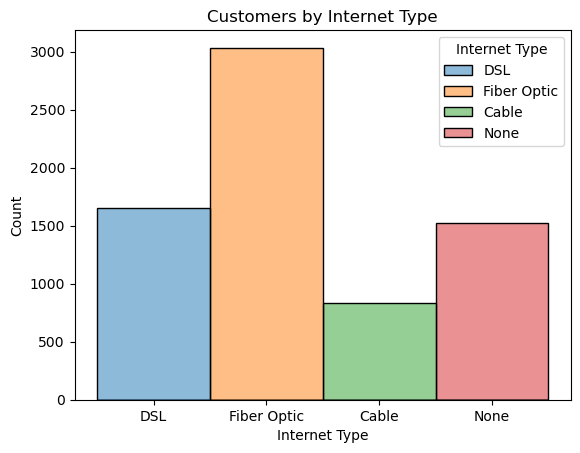

In [81]:
# Customers by Internet Type

sns.histplot(x=df_services["Internet Type"], hue=df_services["Internet Type"])
plt.title("Customers by Internet Type")
plt.savefig(f"images/services-internet-type", bbox_inches = 'tight')
plt.show()

In [82]:
df_services["Contract"].unique()

array(['Month-to-Month', 'One Year', 'Two Year'], dtype=object)

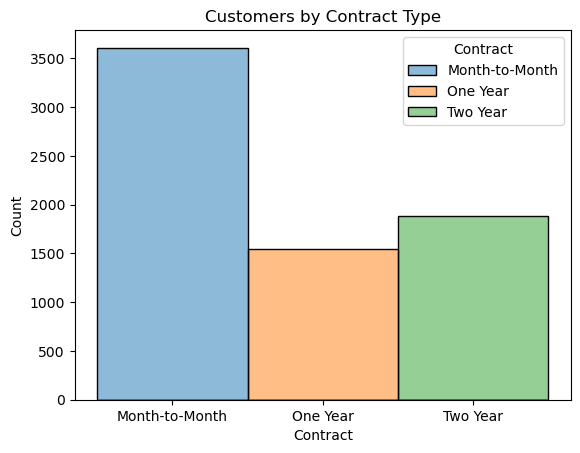

In [83]:
# Customers by Contract Type

sns.histplot(x=df_services["Contract"], hue=df_services["Contract"])
plt.title("Customers by Contract Type")
plt.savefig(f"images/services-contract-type", bbox_inches = 'tight')
plt.show()

In [84]:
df_services["Payment Method"].unique()

array(['Bank Withdrawal', 'Credit Card', 'Mailed Check'], dtype=object)

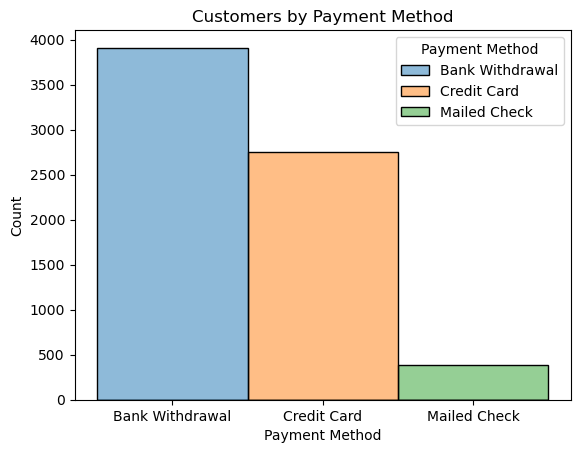

In [85]:
# Customers by Payment Method

sns.histplot(x=df_services["Payment Method"], hue=df_services["Payment Method"])
plt.title("Customers by Payment Method")
plt.savefig(f"images/services-payment-method", bbox_inches = 'tight')
plt.show()

In [86]:
# numerical columns

numerical_columns = df_services.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Number of Services Used']

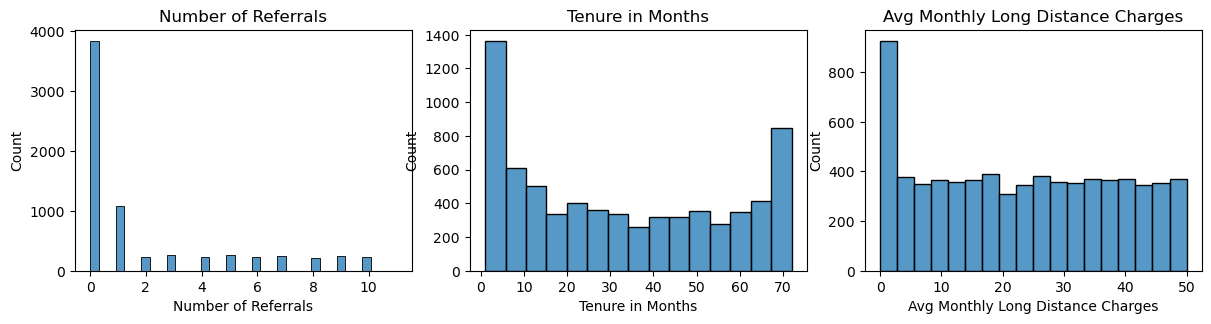

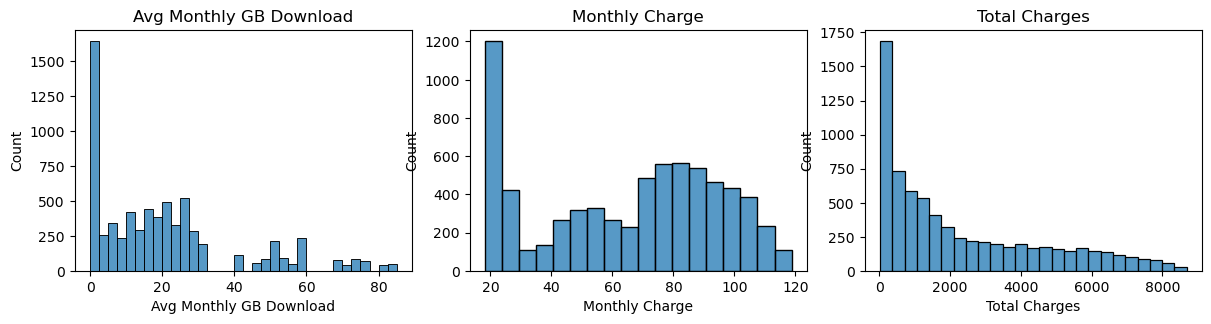

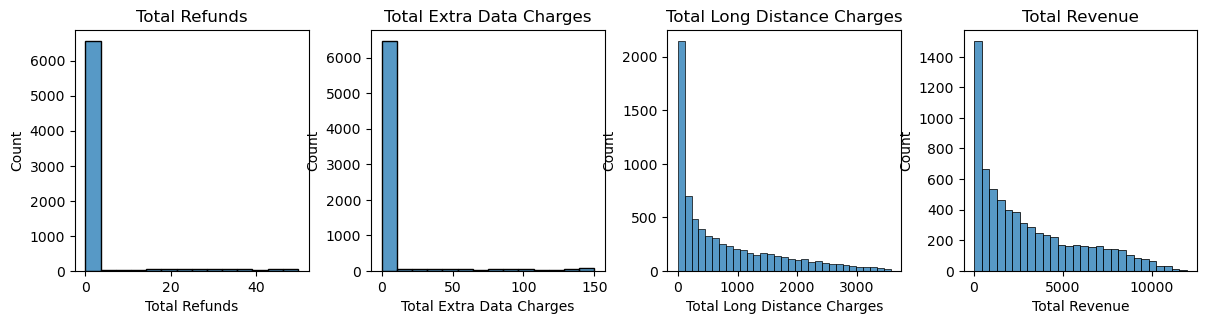

In [87]:
# Distributions of Numerical Columns

col_names_divided = [numerical_columns[:3], numerical_columns[3:6], numerical_columns[6:]]

for i in range(3):
    n = 3
    if i == 2:
        n = 4
    fig, axes = plt.subplots(1, n)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    for column, ax in zip(col_names_divided[i], axes.flatten()):
        sns.histplot(x=column, data=df_services, ax=ax)
        ax.set_title(column)

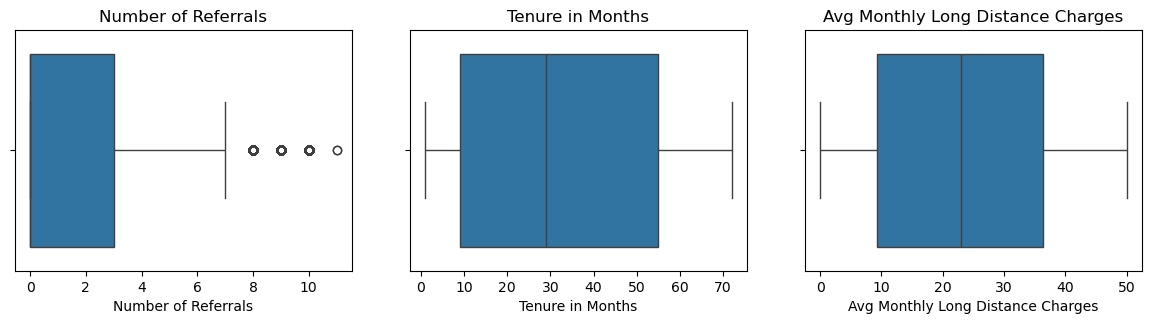

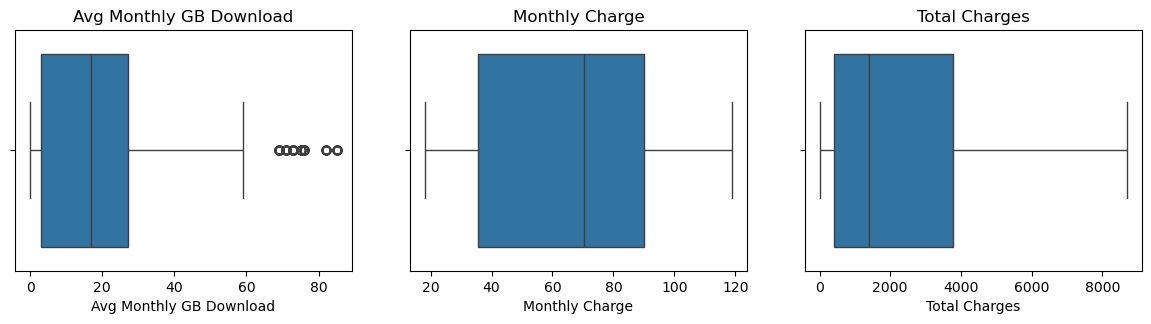

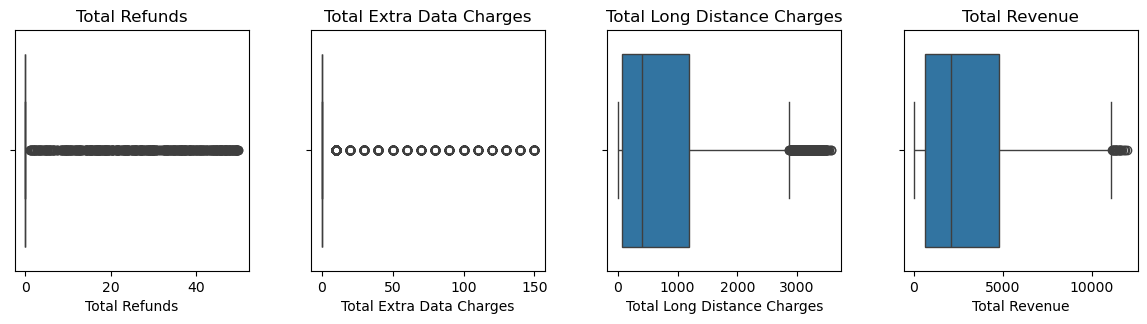

In [88]:
# Distributions of Numerical Columns

for i in range(3):
    n = 3
    if i == 2:
        n = 4
    fig, axes = plt.subplots(1, n)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    for column, ax in zip(col_names_divided[i], axes.flatten()):
        sns.boxplot(x=column, data=df_services, ax=ax)
        ax.set_title(column)
    fig.savefig(f"images/services-boxplot{i}", bbox_inches = 'tight')

In [89]:
df_services = df_services.apply(yes_no_transformer)

In [90]:
df_services.dtypes

Customer ID                           object
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Contract                              object
Paperless Billing                      int64
Payment Method                        object
Monthly Charge                       float64
Total Charges                        float64
Total Refunds                        float64
Total Extr

In [91]:
df_services.isnull().sum()

Customer ID                          0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
Number of Services Used  

In [92]:
df_services.duplicated().sum()

0

# Churn Status

In [94]:
df_status = pd.read_csv("data/Telco_customer_churn_status.csv")

In [95]:
df_status.head()

Status ID Customer ID  Count Quarter  Satisfaction Score Customer Status  \
0  SWSORB1252  8779-QRDMV      1      Q3                   3         Churned   
1  SNAEQA8572  7495-OOKFY      1      Q3                   3         Churned   
2  LMBQNN3714  1658-BYGOY      1      Q3                   2         Churned   
3  VRZYZI9978  4598-XLKNJ      1      Q3                   2         Churned   
4  FDNAKX1688  4846-WHAFZ      1      Q3                   2         Churned   

  Churn Label  Churn Value  Churn Score  CLTV   Churn Category  \
0         Yes            1           91  5433       Competitor   
1         Yes            1           69  5302       Competitor   
2         Yes            1           81  3179       Competitor   
3         Yes            1           88  5337  Dissatisfaction   
4         Yes            1           67  2793            Price   

                   Churn Reason  
0  Competitor offered more data  
1  Competitor made better offer  
2  Competitor made better offer  
3     Limited range of services  
4            Extra data charges

In [96]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Status ID           7043 non-null   object
 1   Customer ID         7043 non-null   object
 2   Count               7043 non-null   int64 
 3   Quarter             7043 non-null   object
 4   Satisfaction Score  7043 non-null   int64 
 5   Customer Status     7043 non-null   object
 6   Churn Label         7043 non-null   object
 7   Churn Value         7043 non-null   int64 
 8   Churn Score         7043 non-null   int64 
 9   CLTV                7043 non-null   int64 
 10  Churn Category      1869 non-null   object
 11  Churn Reason        1869 non-null   object
dtypes: int64(5), object(7)
memory usage: 660.4+ KB


In [97]:
df_status.describe()

Count  Satisfaction Score  Churn Value  Churn Score         CLTV
count  7043.0         7043.000000  7043.000000  7043.000000  7043.000000
mean      1.0            3.244924     0.265370    58.505040  4400.295755
std       0.0            1.201657     0.441561    21.170031  1183.057152
min       1.0            1.000000     0.000000     5.000000  2003.000000
25%       1.0            3.000000     0.000000    40.000000  3469.000000
50%       1.0            3.000000     0.000000    61.000000  4527.000000
75%       1.0            4.000000     1.000000    75.500000  5380.500000
max       1.0            5.000000     1.000000    96.000000  6500.000000

In [98]:
df_status.drop(columns=["Status ID", "Count", "Quarter"], inplace=True)

In [99]:
df_status.head()

Customer ID  Satisfaction Score Customer Status Churn Label  Churn Value  \
0  8779-QRDMV                   3         Churned         Yes            1   
1  7495-OOKFY                   3         Churned         Yes            1   
2  1658-BYGOY                   2         Churned         Yes            1   
3  4598-XLKNJ                   2         Churned         Yes            1   
4  4846-WHAFZ                   2         Churned         Yes            1   

   Churn Score  CLTV   Churn Category                  Churn Reason  
0           91  5433       Competitor  Competitor offered more data  
1           69  5302       Competitor  Competitor made better offer  
2           81  3179       Competitor  Competitor made better offer  
3           88  5337  Dissatisfaction     Limited range of services  
4           67  2793            Price            Extra data charges

In [100]:
df_status["Satisfaction Score"].value_counts()

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

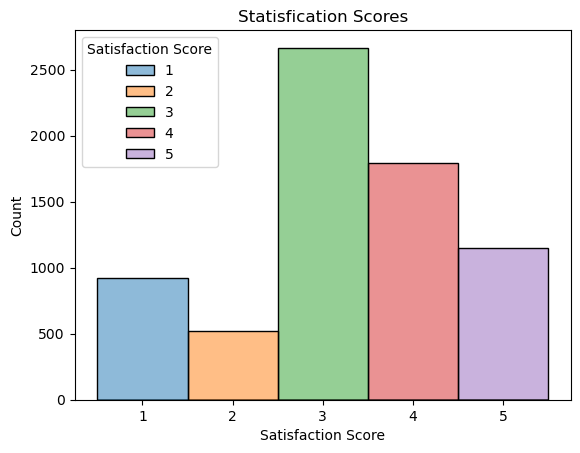

In [101]:
sns.histplot(x=df_status["Satisfaction Score"].sort_values().astype(str), hue=df_status["Satisfaction Score"].sort_values().astype(str))
plt.title("Statisfication Scores")
plt.show()

In [102]:
df_status["Customer Status"].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

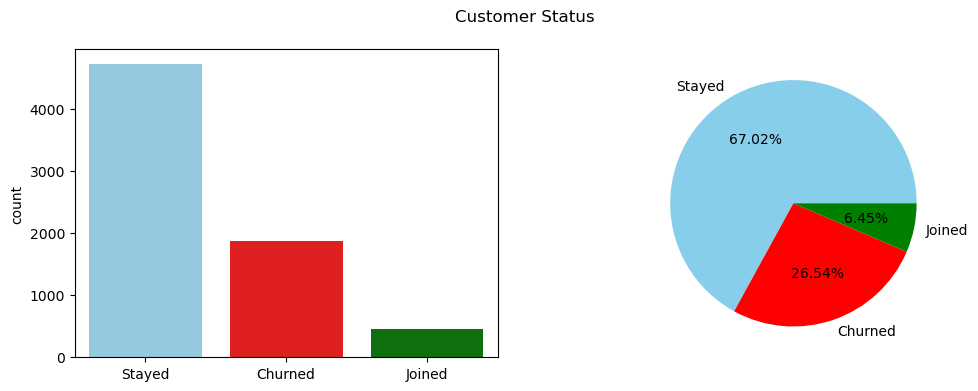

In [103]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
fig.suptitle("Customer Status")
sns.barplot(x=["Stayed", "Churned", "Joined"], y=df_status["Customer Status"].value_counts(), palette=["skyblue","red","green"], ax=axes[0])
axes[1].pie(x=df_status["Customer Status"].value_counts(), labels=["Stayed", "Churned", "Joined"],
        autopct=lambda percent: "{:.2f}%".format(percent),
        colors=["skyblue","red","green"])
plt.show()
fig.savefig("images/customer-churnstatus", bbox_inches = 'tight')

In [104]:
df_status["Churn Value"].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [105]:
df_status["Churn Label"].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

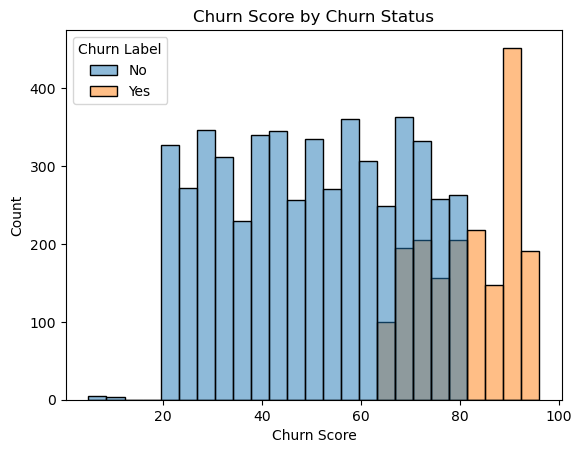

In [106]:
sns.histplot(x=df_status["Churn Score"], hue=df_status["Churn Label"], hue_order=["No", "Yes"])
plt.title("Churn Score by Churn Status")
plt.show()

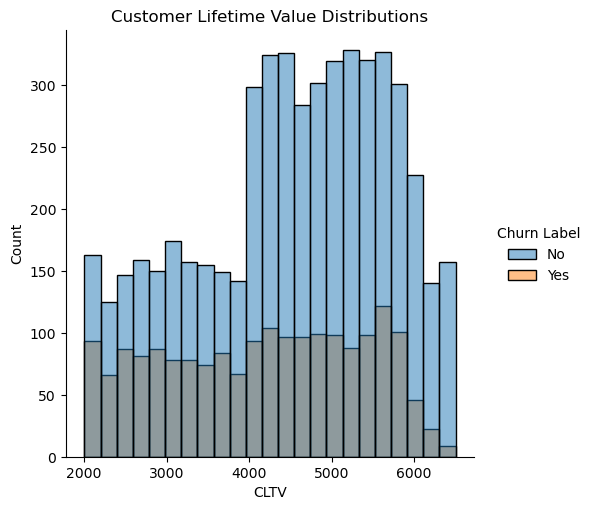

In [107]:
sns.displot(x=df_status["CLTV"], hue=df_status["Churn Label"], hue_order=["No", "Yes"])
plt.title("Customer Lifetime Value Distributions")
plt.savefig("images/cltv-by-churnstatus", bbox_inches = 'tight')
plt.show()

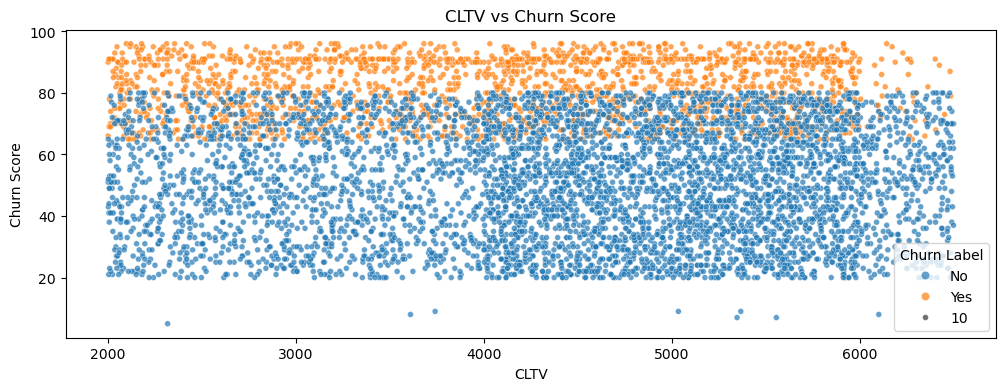

In [108]:
# CLTV vs Churn Score

fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(
    x=df_status["CLTV"], 
    y=df_status["Churn Score"], 
    hue=df_status["Churn Label"], 
    hue_order=["No", "Yes"], 
    alpha=0.7,
    size=10,
    markers='o',
    ax=ax
)
plt.title("CLTV vs Churn Score")
fig.savefig("images/cltv-vs-churnscore", bbox_inches = 'tight')
plt.show()

In [109]:
# top 10 churn category

df_status["Churn Category"].value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

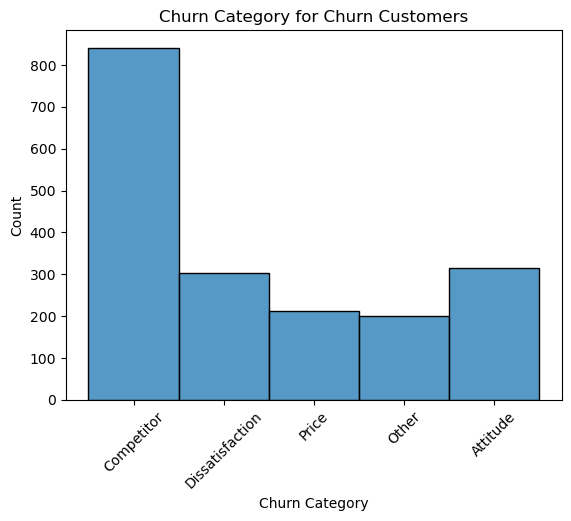

In [110]:
sns.histplot(x=df_status["Churn Category"])
plt.title("Churn Category for Churn Customers")
plt.xticks(rotation=45)
plt.savefig("images/churn-categories", bbox_inches = 'tight')
plt.show()

In [111]:
df_status["Churn Reason"].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

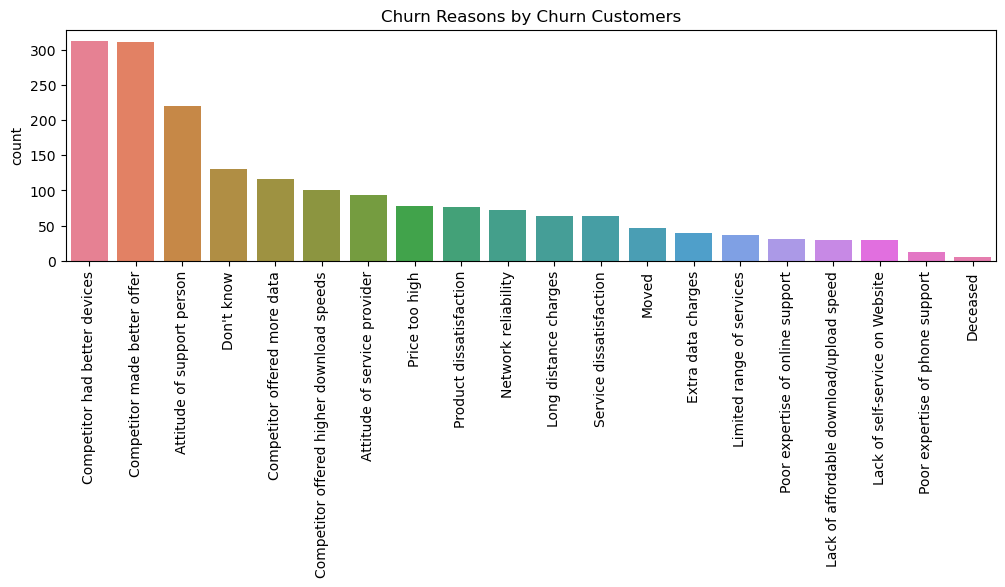

In [112]:
sorted_churn_reason = df_status["Churn Reason"].value_counts()
sorted_churn_reason_names = sorted_churn_reason.index.tolist()

fig, ax = plt.subplots(figsize=(4, 5))
fig.set_size_inches(12,3)
sns.barplot(x=sorted_churn_reason_names, y=sorted_churn_reason, hue=sorted_churn_reason_names, order=sorted_churn_reason_names, legend=False, ax=ax)
plt.title("Churn Reasons by Churn Customers")
plt.xticks(rotation=90)
fig.savefig("images/churn-reasons", bbox_inches = 'tight')
plt.show()

In [113]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         7043 non-null   object
 1   Satisfaction Score  7043 non-null   int64 
 2   Customer Status     7043 non-null   object
 3   Churn Label         7043 non-null   object
 4   Churn Value         7043 non-null   int64 
 5   Churn Score         7043 non-null   int64 
 6   CLTV                7043 non-null   int64 
 7   Churn Category      1869 non-null   object
 8   Churn Reason        1869 non-null   object
dtypes: int64(4), object(5)
memory usage: 495.3+ KB


In [114]:
df_status.isnull().sum()

Customer ID              0
Satisfaction Score       0
Customer Status          0
Churn Label              0
Churn Value              0
Churn Score              0
CLTV                     0
Churn Category        5174
Churn Reason          5174
dtype: int64

df_status.duplicated().sum()

In [116]:
df_status.drop(columns=["Customer Status", "Churn Label"], inplace=True)

In [117]:
df_status.head()

Customer ID  Satisfaction Score  Churn Value  Churn Score  CLTV  \
0  8779-QRDMV                   3            1           91  5433   
1  7495-OOKFY                   3            1           69  5302   
2  1658-BYGOY                   2            1           81  3179   
3  4598-XLKNJ                   2            1           88  5337   
4  4846-WHAFZ                   2            1           67  2793   

    Churn Category                  Churn Reason  
0       Competitor  Competitor offered more data  
1       Competitor  Competitor made better offer  
2       Competitor  Competitor made better offer  
3  Dissatisfaction     Limited range of services  
4            Price            Extra data charges

# Merging

## Merging Location & Population

In [120]:
df_location.head()

Customer ID         City  Zip Code
0  8779-QRDMV  Los Angeles     90022
1  7495-OOKFY  Los Angeles     90063
2  1658-BYGOY  Los Angeles     90065
3  4598-XLKNJ    Inglewood     90303
4  4846-WHAFZ     Whittier     90602

In [121]:
df_population.head()

Zip Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852
4     90005       43019

In [122]:
df_churn = pd.merge(df_location, df_population, how="left", on=["Zip Code"])

In [123]:
df_churn.head()

Customer ID         City  Zip Code  Population
0  8779-QRDMV  Los Angeles     90022       68701
1  7495-OOKFY  Los Angeles     90063       55668
2  1658-BYGOY  Los Angeles     90065       47534
3  4598-XLKNJ    Inglewood     90303       27778
4  4846-WHAFZ     Whittier     90602       26265

In [124]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  7043 non-null   object
 1   City         7043 non-null   object
 2   Zip Code     7043 non-null   int64 
 3   Population   7043 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 220.2+ KB


In [125]:
# replace zip code & population with customer concentration in zipcode
customer_by_zipcode = df_churn["Zip Code"].value_counts().to_dict()
population_by_zipcode = df_churn[["Population", "Zip Code"]].set_index("Zip Code").to_dict()["Population"]
# print(population_by_zipcode)
customer_concentration_by_zipcode = dict()

for zipcode, pop in population_by_zipcode.items():
    customer = customer_by_zipcode.get(zipcode, 0)
    customer_concentration_by_zipcode[zipcode] = customer / pop

df_churn["Customer Concentration"] = df_churn["Zip Code"].apply(lambda zipcode: customer_concentration_by_zipcode[zipcode])

In [126]:
df_churn.head()

Customer ID         City  Zip Code  Population  Customer Concentration
0  8779-QRDMV  Los Angeles     90022       68701                0.000073
1  7495-OOKFY  Los Angeles     90063       55668                0.000090
2  1658-BYGOY  Los Angeles     90065       47534                0.000105
3  4598-XLKNJ    Inglewood     90303       27778                0.000180
4  4846-WHAFZ     Whittier     90602       26265                0.000190

In [127]:
df_churn.drop(columns=["Population"], inplace=True)

In [128]:
df_churn.head()

Customer ID         City  Zip Code  Customer Concentration
0  8779-QRDMV  Los Angeles     90022                0.000073
1  7495-OOKFY  Los Angeles     90063                0.000090
2  1658-BYGOY  Los Angeles     90065                0.000105
3  4598-XLKNJ    Inglewood     90303                0.000180
4  4846-WHAFZ     Whittier     90602                0.000190

## Merging Demographics

In [130]:
df_demo.head()

Customer ID  Gender  Age  Senior Citizen  Married  Dependents
0  8779-QRDMV    Male   78               1        0           0
1  7495-OOKFY  Female   74               1        1           1
2  1658-BYGOY    Male   71               1        0           3
3  4598-XLKNJ  Female   78               1        1           1
4  4846-WHAFZ  Female   80               1        1           1

In [131]:
df_churn = pd.merge(df_churn, df_demo, how='left', on=["Customer ID"])

In [132]:
df_churn.head()

Customer ID         City  Zip Code  Customer Concentration  Gender  Age  \
0  8779-QRDMV  Los Angeles     90022                0.000073    Male   78   
1  7495-OOKFY  Los Angeles     90063                0.000090  Female   74   
2  1658-BYGOY  Los Angeles     90065                0.000105    Male   71   
3  4598-XLKNJ    Inglewood     90303                0.000180  Female   78   
4  4846-WHAFZ     Whittier     90602                0.000190  Female   80   

   Senior Citizen  Married  Dependents  
0               1        0           0  
1               1        1           1  
2               1        0           3  
3               1        1           1  
4               1        1           1

In [133]:
df_churn.isnull().sum()

Customer ID               0
City                      0
Zip Code                  0
Customer Concentration    0
Gender                    0
Age                       0
Senior Citizen            0
Married                   0
Dependents                0
dtype: int64

## Merging Services

In [135]:
df_services.head()

Customer ID  Number of Referrals  Tenure in Months  Phone Service  \
0  8779-QRDMV                    0                 1              0   
1  7495-OOKFY                    1                 8              1   
2  1658-BYGOY                    0                18              1   
3  4598-XLKNJ                    1                25              1   
4  4846-WHAFZ                    1                37              1   

   Avg Monthly Long Distance Charges  Multiple Lines Internet Type  \
0                               0.00               0           DSL   
1                              48.85               1   Fiber Optic   
2                              11.33               1   Fiber Optic   
3                              19.76               0   Fiber Optic   
4                               6.33               1   Fiber Optic   

   Avg Monthly GB Download  Online Security  Online Backup  ...  \
0                        8                0              0  ...   
1                       17                0              1  ...   
2                       52                0              0  ...   
3                       12                0              1  ...   
4                       14                0              0  ...   

         Contract  Paperless Billing   Payment Method  Monthly Charge  \
0  Month-to-Month                  1  Bank Withdrawal           39.65   
1  Month-to-Month                  1      Credit Card           80.65   
2  Month-to-Month                  1  Bank Withdrawal           95.45   
3  Month-to-Month                  1  Bank Withdrawal           98.50   
4  Month-to-Month                  1  Bank Withdrawal           76.50   

   Total Charges  Total Refunds Total Extra Data Charges  \
0          39.65           0.00                       20   
1         633.30           0.00                        0   
2        1752.55          45.61                        0   
3        2514.50          13.43                        0   
4        2868.15           0.00                        0   

   Total Long Distance Charges Total Revenue  Number of Services Used  
0                         0.00         59.65                        3  
1                       390.80       1024.10                        5  
2                       203.94       1910.88                        7  
3                       494.00       2995.07                        7  
4                       234.21       3102.36                        4  

[5 rows x 26 columns]

In [136]:
df_churn = pd.merge(df_churn, df_services, how='left', on=["Customer ID"])

In [137]:
df_churn.head()

Customer ID         City  Zip Code  Customer Concentration  Gender  Age  \
0  8779-QRDMV  Los Angeles     90022                0.000073    Male   78   
1  7495-OOKFY  Los Angeles     90063                0.000090  Female   74   
2  1658-BYGOY  Los Angeles     90065                0.000105    Male   71   
3  4598-XLKNJ    Inglewood     90303                0.000180  Female   78   
4  4846-WHAFZ     Whittier     90602                0.000190  Female   80   

   Senior Citizen  Married  Dependents  Number of Referrals  ...  \
0               1        0           0                    0  ...   
1               1        1           1                    1  ...   
2               1        0           3                    0  ...   
3               1        1           1                    1  ...   
4               1        1           1                    1  ...   

         Contract  Paperless Billing   Payment Method  Monthly Charge  \
0  Month-to-Month                  1  Bank Withdrawal           39.65   
1  Month-to-Month                  1      Credit Card           80.65   
2  Month-to-Month                  1  Bank Withdrawal           95.45   
3  Month-to-Month                  1  Bank Withdrawal           98.50   
4  Month-to-Month                  1  Bank Withdrawal           76.50   

  Total Charges  Total Refunds  Total Extra Data Charges  \
0         39.65           0.00                        20   
1        633.30           0.00                         0   
2       1752.55          45.61                         0   
3       2514.50          13.43                         0   
4       2868.15           0.00                         0   

   Total Long Distance Charges  Total Revenue  Number of Services Used  
0                         0.00          59.65                        3  
1                       390.80        1024.10                        5  
2                       203.94        1910.88                        7  
3                       494.00        2995.07                        7  
4                       234.21        3102.36                        4  

[5 rows x 34 columns]

In [138]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   City                               7043 non-null   object 
 2   Zip Code                           7043 non-null   int64  
 3   Customer Concentration             7043 non-null   float64
 4   Gender                             7043 non-null   object 
 5   Age                                7043 non-null   int64  
 6   Senior Citizen                     7043 non-null   int64  
 7   Married                            7043 non-null   int64  
 8   Dependents                         7043 non-null   int64  
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Phone Service                      7043 non-null   int64

## Merging Status

In [140]:
df_status.head()

Customer ID  Satisfaction Score  Churn Value  Churn Score  CLTV  \
0  8779-QRDMV                   3            1           91  5433   
1  7495-OOKFY                   3            1           69  5302   
2  1658-BYGOY                   2            1           81  3179   
3  4598-XLKNJ                   2            1           88  5337   
4  4846-WHAFZ                   2            1           67  2793   

    Churn Category                  Churn Reason  
0       Competitor  Competitor offered more data  
1       Competitor  Competitor made better offer  
2       Competitor  Competitor made better offer  
3  Dissatisfaction     Limited range of services  
4            Price            Extra data charges

In [141]:
df_churn = pd.merge(df_churn, df_status, how='left', on=["Customer ID"])

In [142]:
df_churn.head()

Customer ID         City  Zip Code  Customer Concentration  Gender  Age  \
0  8779-QRDMV  Los Angeles     90022                0.000073    Male   78   
1  7495-OOKFY  Los Angeles     90063                0.000090  Female   74   
2  1658-BYGOY  Los Angeles     90065                0.000105    Male   71   
3  4598-XLKNJ    Inglewood     90303                0.000180  Female   78   
4  4846-WHAFZ     Whittier     90602                0.000190  Female   80   

   Senior Citizen  Married  Dependents  Number of Referrals  ...  \
0               1        0           0                    0  ...   
1               1        1           1                    1  ...   
2               1        0           3                    0  ...   
3               1        1           1                    1  ...   
4               1        1           1                    1  ...   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                        20                         0.00          59.65   
1                         0                       390.80        1024.10   
2                         0                       203.94        1910.88   
3                         0                       494.00        2995.07   
4                         0                       234.21        3102.36   

   Number of Services Used Satisfaction Score  Churn Value  Churn Score  CLTV  \
0                        3                  3            1           91  5433   
1                        5                  3            1           69  5302   
2                        7                  2            1           81  3179   
3                        7                  2            1           88  5337   
4                        4                  2            1           67  2793   

    Churn Category                  Churn Reason  
0       Competitor  Competitor offered more data  
1       Competitor  Competitor made better offer  
2       Competitor  Competitor made better offer  
3  Dissatisfaction     Limited range of services  
4            Price            Extra data charges  

[5 rows x 40 columns]

In [143]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   City                               7043 non-null   object 
 2   Zip Code                           7043 non-null   int64  
 3   Customer Concentration             7043 non-null   float64
 4   Gender                             7043 non-null   object 
 5   Age                                7043 non-null   int64  
 6   Senior Citizen                     7043 non-null   int64  
 7   Married                            7043 non-null   int64  
 8   Dependents                         7043 non-null   int64  
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Phone Service                      7043 non-null   int64

In [144]:
df_churn.isnull().sum()

Customer ID                             0
City                                    0
Zip Code                                0
Customer Concentration                  0
Gender                                  0
Age                                     0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Referrals                     0
Tenure in Months                        0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

In [145]:
df_churn.duplicated().sum()

0

In [146]:
df_churn.drop(columns=["Customer ID", "City", "Zip Code"], inplace=True)

In [147]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer Concentration             7043 non-null   float64
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Senior Citizen                     7043 non-null   int64  
 4   Married                            7043 non-null   int64  
 5   Dependents                         7043 non-null   int64  
 6   Number of Referrals                7043 non-null   int64  
 7   Tenure in Months                   7043 non-null   int64  
 8   Phone Service                      7043 non-null   int64  
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   int64  
 11  Internet Type                      7043 non-null   objec

## segmentation based on demographics

In [149]:
# pip install yellowbrick

In [150]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [151]:
le_gender = LabelEncoder()
df_churn["Gender"] = le_gender.fit_transform(df_churn["Gender"])

In [152]:
# Initialize the KElbowVisualizer with the KMeans estimator and a range of K values
elbow_m = KElbowVisualizer(KMeans(max_iter=400, random_state=42), k=(2,11))

In [153]:
# demographics columns
demographic_cols = ["Gender", "Age", "Senior Citizen", "Married", "Dependents"]

In [154]:
demo_data = df_churn[demographic_cols]

In [155]:
std_scaler = StandardScaler()
demo_data = std_scaler.fit_transform(demo_data)

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

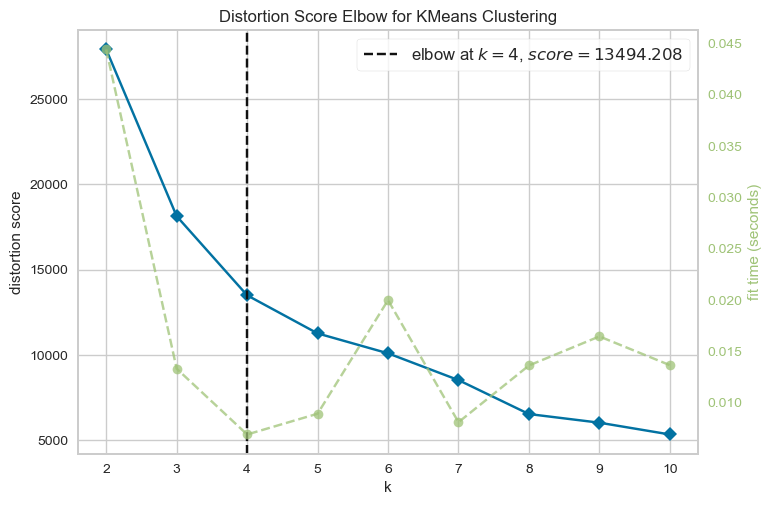

In [156]:
elbow_m.fit(demo_data)
elbow_m.show("images/demographics-kmeans-elbow")

In [157]:
# Re-Train K means model with k=4
kmeans_model = KMeans(n_clusters = 4,max_iter=400,random_state=42)

kmeans_model.fit_predict(df_churn[demographic_cols])

array([2, 2, 2, ..., 0, 0, 3], dtype=int32)

In [158]:
# Create data arrays
cluster_centers = kmeans_model.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[ 6.50622690e-01,  5.13728530e+11, -4.99600361e-16,
         6.33212020e-01,  6.87558177e-01,  5.01152605e-01,
         2.69649608e+01, -4.99600361e-16,  4.90548640e-01,
         5.23282619e-01],
       [ 6.51841737e-01,  1.30227651e+25,  4.36035048e-02,
         5.94842071e-01,  6.49166690e-01,  5.01890870e-01,
         5.78287412e+01,  4.26796326e-02,  4.66774716e-01,
         5.00270124e-01],
       [ 6.55715600e-01,  5.10975226e+31,  1.71828183e+00,
         6.58833707e-01,  1.06939774e-01,  5.04233302e-01,
         7.30112888e+01,  1.00000000e+00,  5.06114770e-01,
         1.01599247e-01],
       [ 6.68182472e-01,  5.10126595e+18, -4.99600361e-16,
         6.12121511e-01,  7.30602109e-01,  5.11734694e-01,
         4.30760204e+01, -4.99600361e-16,  4.77551020e-01,
         5.48469388e-01]])

In [159]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3]], axis=1)
df_churn["Customer Segment"] = kmeans_model.labels_

In [160]:
df_churn.head()

Customer Concentration  Gender  Age  Senior Citizen  Married  Dependents  \
0                0.000073       1   78               1        0           0   
1                0.000090       0   74               1        1           1   
2                0.000105       1   71               1        0           3   
3                0.000180       0   78               1        1           1   
4                0.000190       0   80               1        1           1   

   Number of Referrals  Tenure in Months  Phone Service  \
0                    0                 1              0   
1                    1                 8              1   
2                    0                18              1   
3                    1                25              1   
4                    1                37              1   

   Avg Monthly Long Distance Charges  ...  Total Long Distance Charges  \
0                               0.00  ...                         0.00   
1                              48.85  ...                       390.80   
2                              11.33  ...                       203.94   
3                              19.76  ...                       494.00   
4                               6.33  ...                       234.21   

  Total Revenue  Number of Services Used  Satisfaction Score  Churn Value  \
0         59.65                        3                   3            1   
1       1024.10                        5                   3            1   
2       1910.88                        7                   2            1   
3       2995.07                        7                   2            1   
4       3102.36                        4                   2            1   

   Churn Score  CLTV   Churn Category                  Churn Reason  \
0           91  5433       Competitor  Competitor offered more data   
1           69  5302       Competitor  Competitor made better offer   
2           81  3179       Competitor  Competitor made better offer   
3           88  5337  Dissatisfaction     Limited range of services   
4           67  2793            Price            Extra data charges   

   Customer Segment  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  

[5 rows x 38 columns]

In [161]:
segmented_demo = df_churn[demographic_cols+["Customer Segment"]]
segmented_demo[segmented_demo["Customer Segment"] == 0]

Gender  Age  Senior Citizen  Married  Dependents  Customer Segment
1143       0   19               0        0           2                 0
1144       0   31               0        0           2                 0
1145       0   23               0        1           3                 0
1147       0   21               0        1           0                 0
1148       1   29               0        0           0                 0
...      ...  ...             ...      ...         ...               ...
7027       0   30               0        0           0                 0
7033       0   23               0        1           0                 0
7038       0   30               0        0           0                 0
7040       0   30               0        1           2                 0
7041       0   32               0        1           2                 0

[2169 rows x 6 columns]

In [162]:
segmented_demo[segmented_demo["Customer Segment"] == 1]

Gender  Age  Senior Citizen  Married  Dependents  Customer Segment
11         1   65               1        0           0                 1
47         0   65               1        0           0                 1
49         0   65               1        0           0                 1
52         1   65               1        0           0                 1
63         0   65               1        0           0                 1
...      ...  ...             ...      ...         ...               ...
7032       1   64               0        0           0                 1
7034       0   57               0        0           0                 1
7035       1   63               0        0           0                 1
7036       1   57               0        0           0                 1
7037       0   62               0        0           0                 1

[1851 rows x 6 columns]

In [163]:
segmented_demo[segmented_demo["Customer Segment"] == 2]

Gender  Age  Senior Citizen  Married  Dependents  Customer Segment
0          1   78               1        0           0                 2
1          0   74               1        1           1                 2
2          1   71               1        0           3                 2
3          0   78               1        1           1                 2
4          0   80               1        1           1                 2
...      ...  ...             ...      ...         ...               ...
1137       1   78               1        1           0                 2
1138       1   80               1        1           0                 2
1139       0   77               1        1           0                 2
1140       0   75               1        0           0                 2
1141       1   67               1        1           0                 2

[1063 rows x 6 columns]

In [164]:
segmented_demo[segmented_demo["Customer Segment"] == 3]

Gender  Age  Senior Citizen  Married  Dependents  Customer Segment
1142       1   37               0        0           0                 3
1146       1   38               0        0           1                 3
1154       0   48               0        0           2                 3
1157       0   41               0        0           2                 3
1163       1   37               0        1           1                 3
...      ...  ...             ...      ...         ...               ...
7025       0   37               0        0           0                 3
7028       1   39               0        1           1                 3
7029       1   45               0        0           0                 3
7039       1   38               0        1           2                 3
7042       1   44               0        0           0                 3

[1960 rows x 6 columns]

# Service Usage by Customer Segment

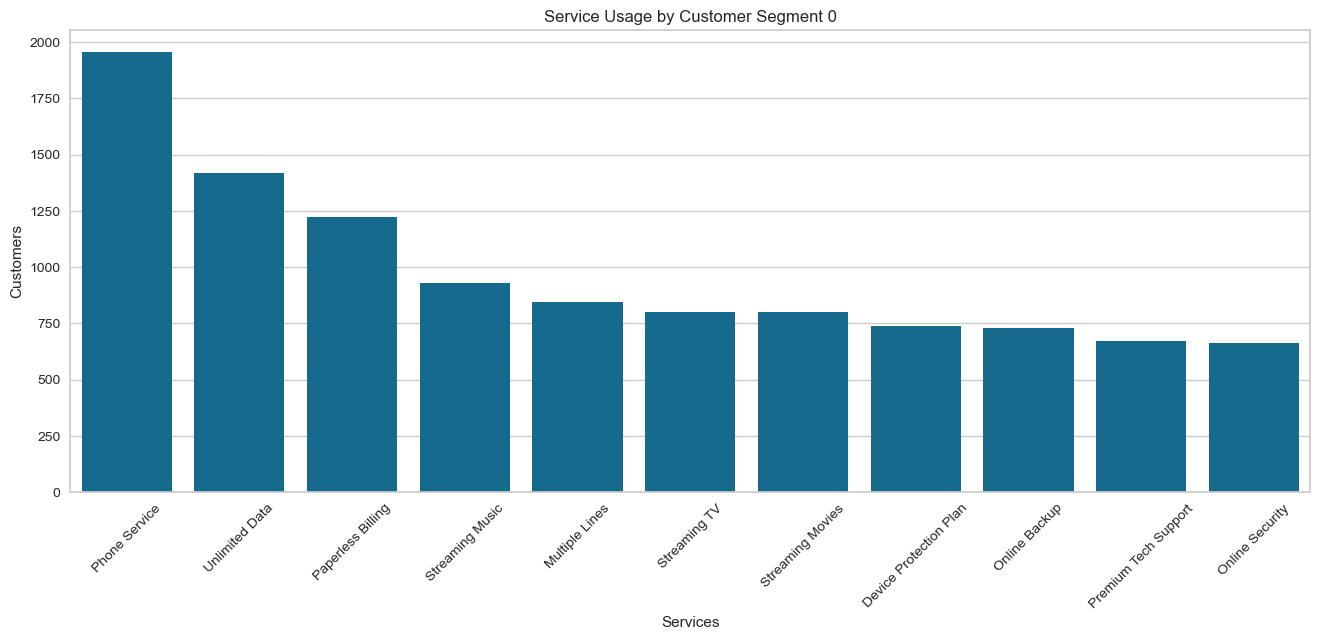

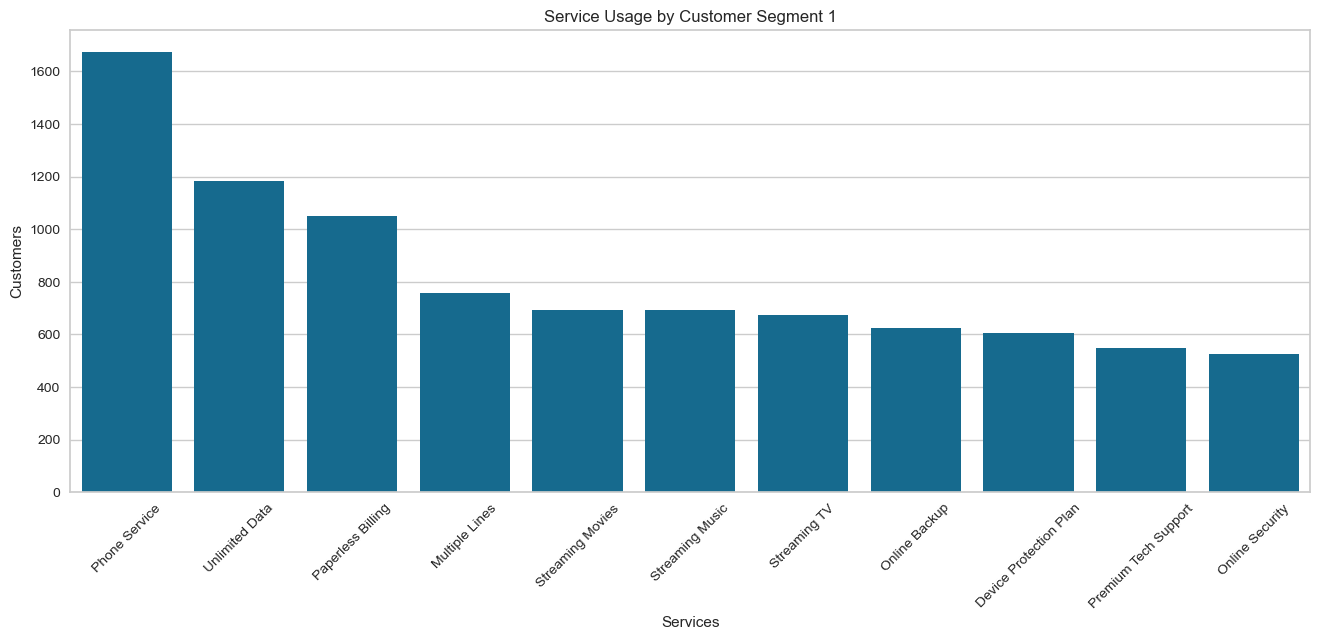

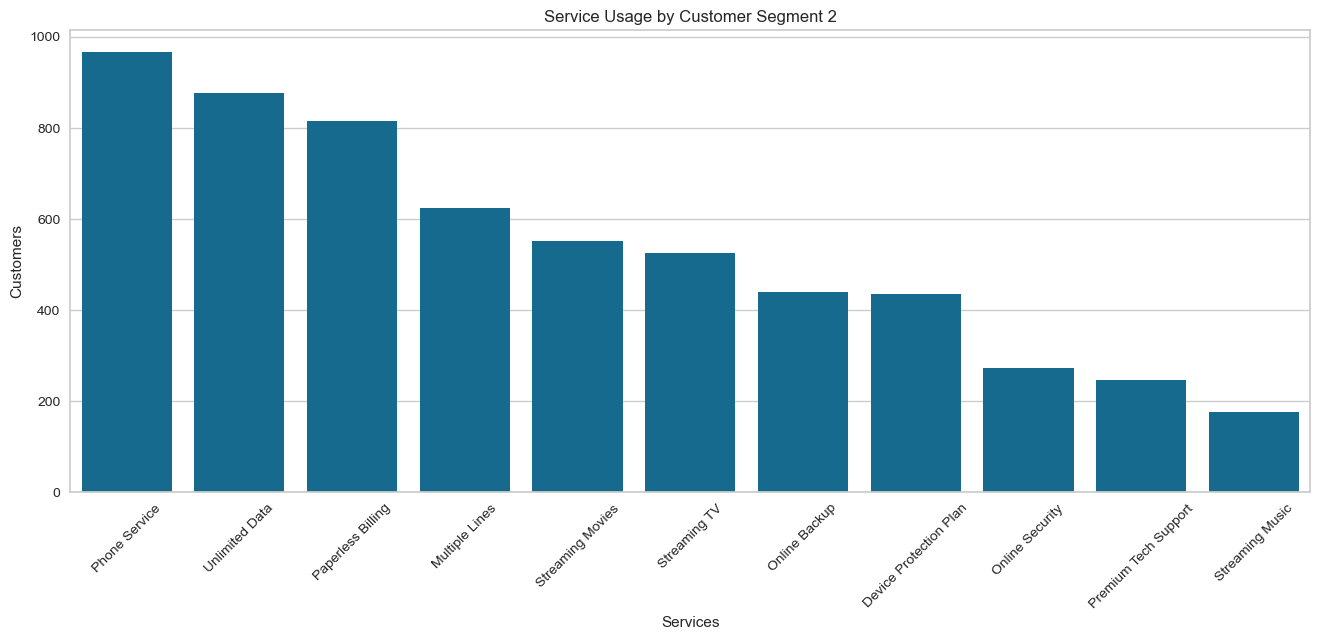

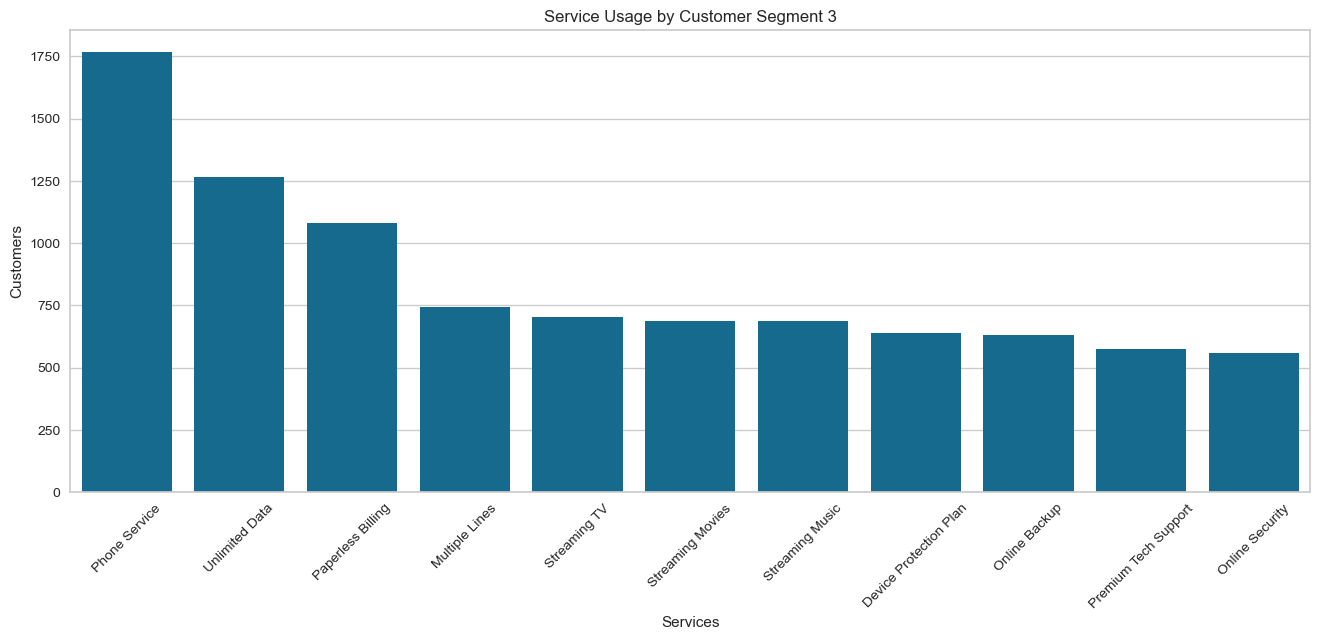

In [166]:
service_cols = [
    'Phone Service',
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Paperless Billing'
]

service_usage_mask = df_churn[service_cols] == 1

segments = df_churn["Customer Segment"].unique()
segments.sort()

for i, segment in enumerate(segments):
    plt.figure(figsize=(16,6))
    segmentRows = df_churn[df_churn["Customer Segment"] == segment]
    serviceUsageBySegment = segmentRows[segmentRows[service_cols] == 1][service_cols].sum().sort_values(ascending=False)
    sns.barplot(x=serviceUsageBySegment.index, y=serviceUsageBySegment)
    plt.xlabel("Services")
    plt.ylabel("Customers")
    plt.xticks(rotation=45)
    plt.title(f"Service Usage by Customer Segment {segment}")
    plt.savefig(f"images/service-usage-by-customer-segment{i}", bbox_inches = 'tight')
    plt.show()

# Correlation of features on Churn by Segments

In [168]:
le_internet = LabelEncoder()
df_churn["Internet Type"] = le_internet.fit_transform(df_churn["Internet Type"])

In [169]:
le_contract = LabelEncoder()
df_churn["Contract"] = le_contract.fit_transform(df_churn["Contract"])

In [170]:
le_payment = LabelEncoder()
df_churn["Payment Method"] = le_payment.fit_transform(df_churn["Payment Method"])

In [171]:
df_churn.dtypes

Customer Concentration               float64
Gender                                 int64
Age                                    int64
Senior Citizen                         int64
Married                                int64
Dependents                             int64
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Type                          int64
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Contract                               int64
Paperless 

In [172]:
info_cols = [
    'Customer Concentration',
    'Number of Referrals',
    'Tenure in Months',
    'Internet Type',
    'Avg Monthly GB Download',
    'Contract',
    'Payment Method',
    'Number of Services Used',
    'Satisfaction Score',
    'CLTV',
    'Customer Segment'
]
charges_cols = [
    'Avg Monthly Long Distance Charges',
    'Monthly Charge',
    'Total Charges',
    'Total Refunds',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Total Revenue'
]

feature_cols = info_cols + service_cols + charges_cols

segments = df_churn["Customer Segment"].unique()
segments.sort()

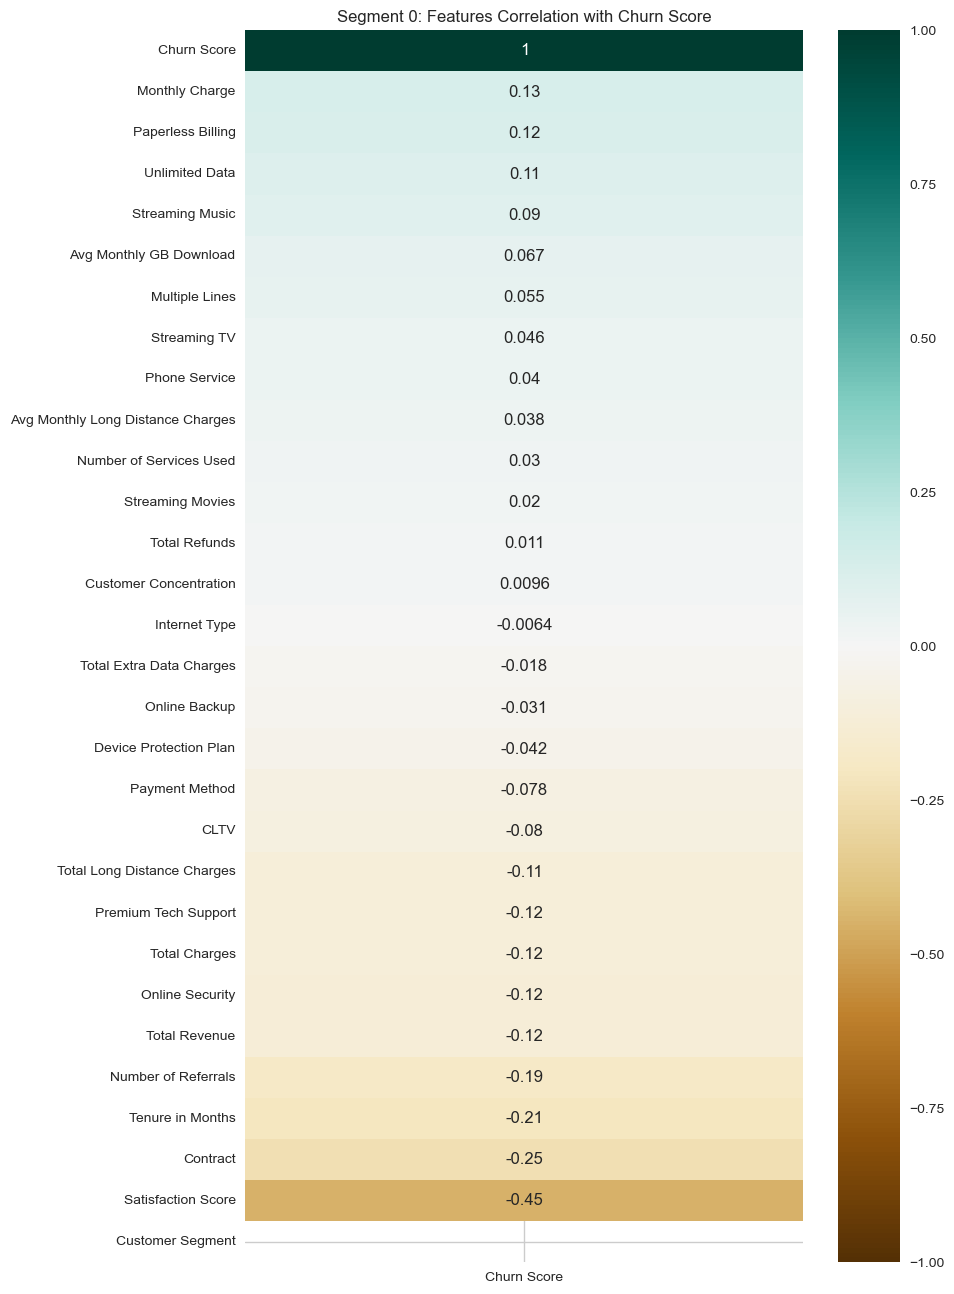

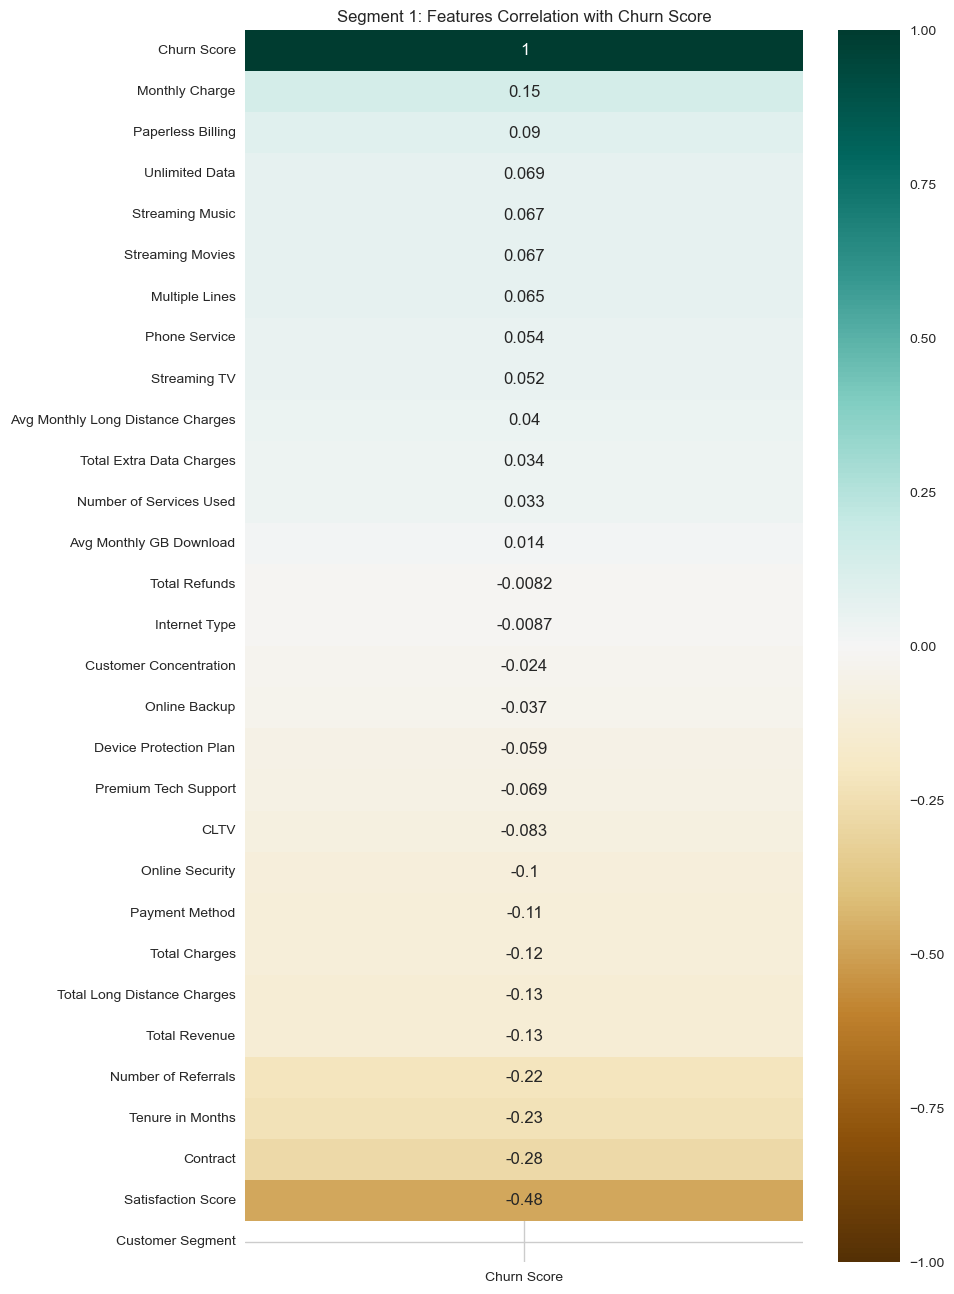

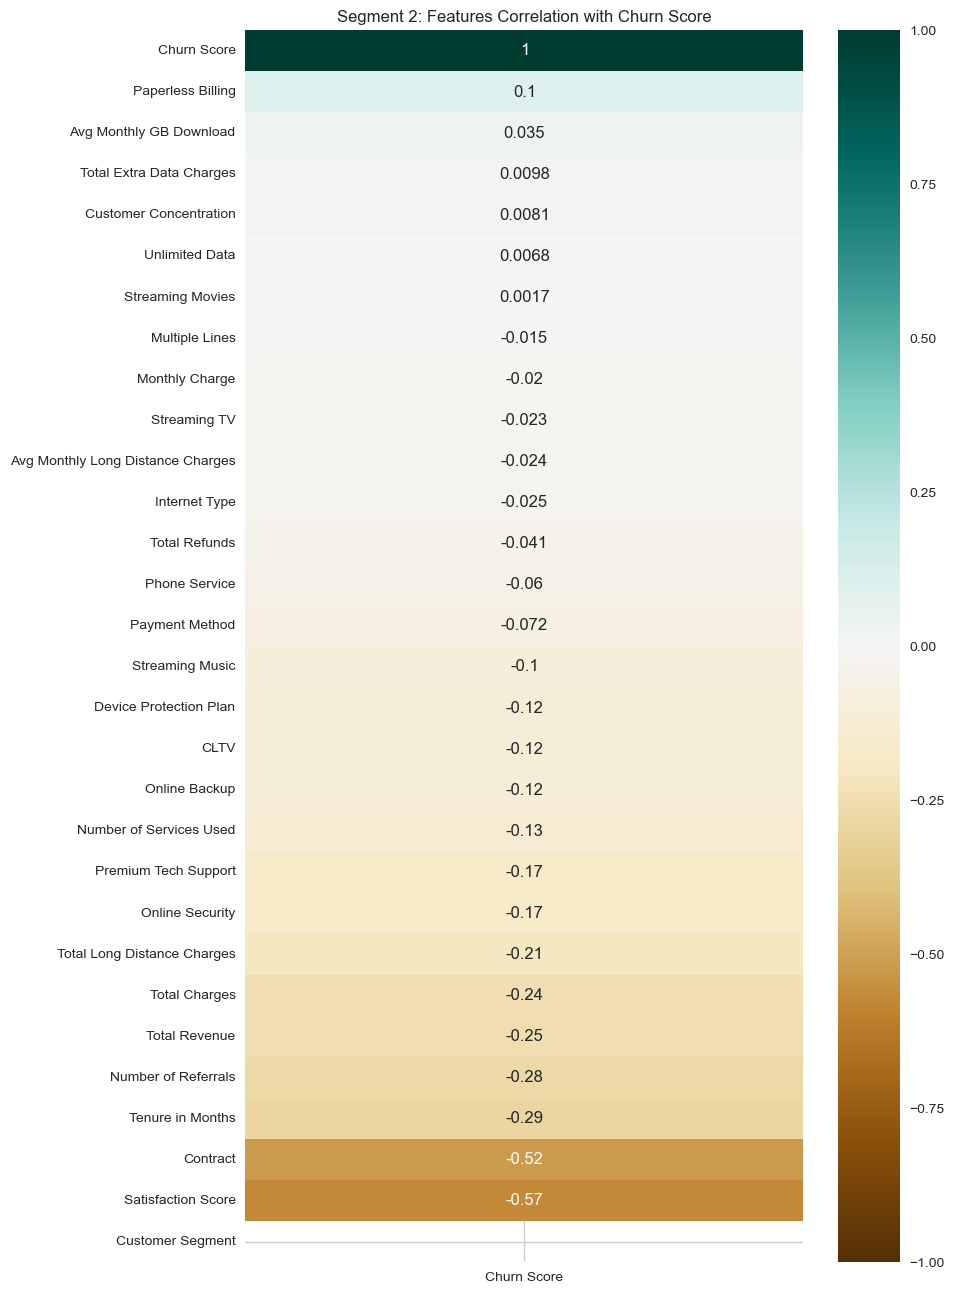

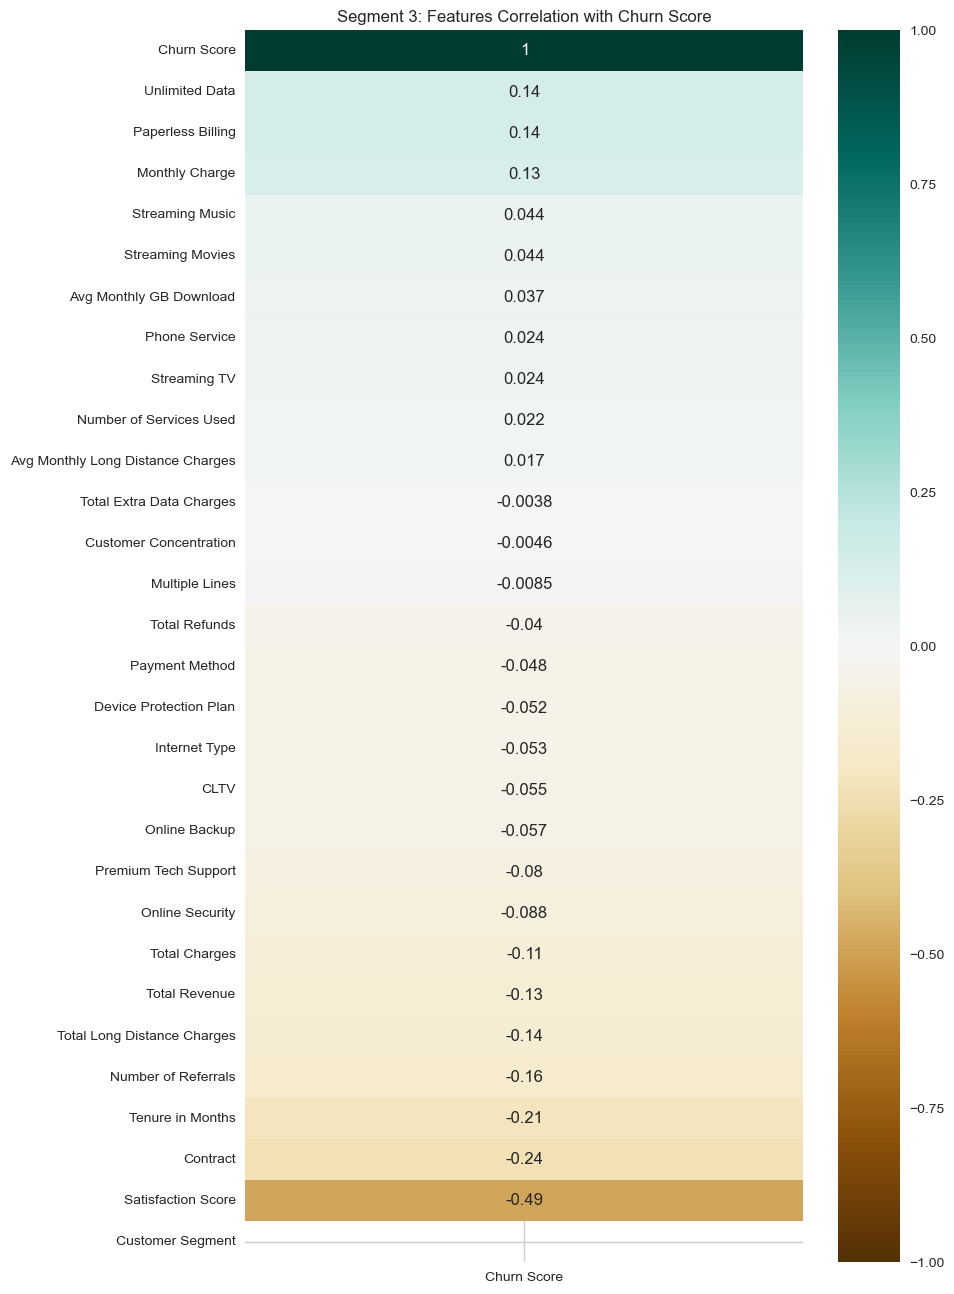

In [173]:
for segment in segments:
    plt.figure(figsize=(9,16))
    feature_churn_rows = df_churn[feature_cols + ["Churn Score"]]
    segmentRows = feature_churn_rows[feature_churn_rows["Customer Segment"] == segment]
    
    heatmap = sns.heatmap(segmentRows.corr()[['Churn Score']].sort_values(by='Churn Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(f'Segment {segment}: Features Correlation with Churn Score');
    plt.show()

# Correlation of features on CLTV by Segments

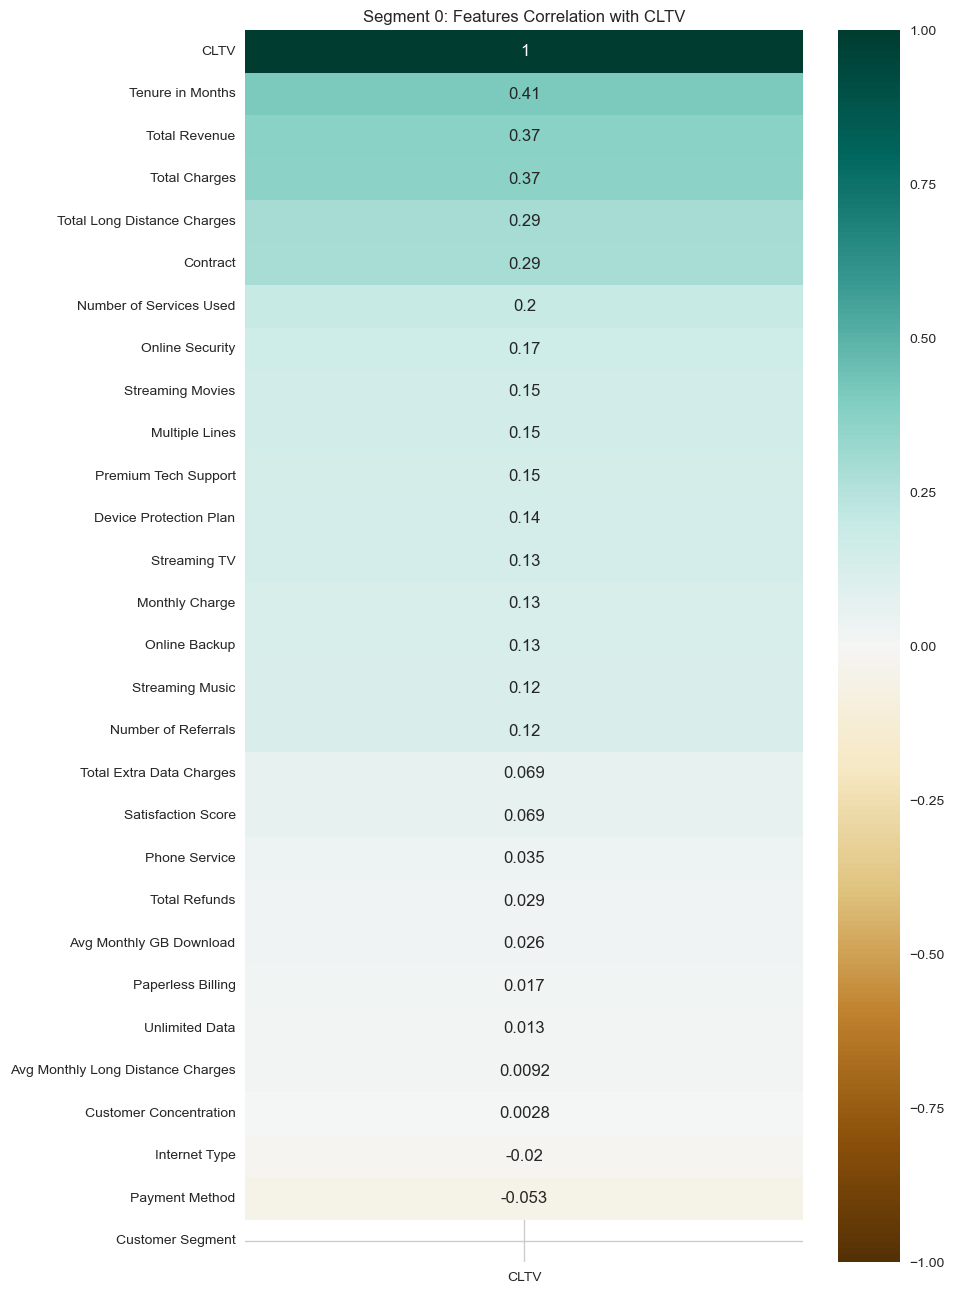

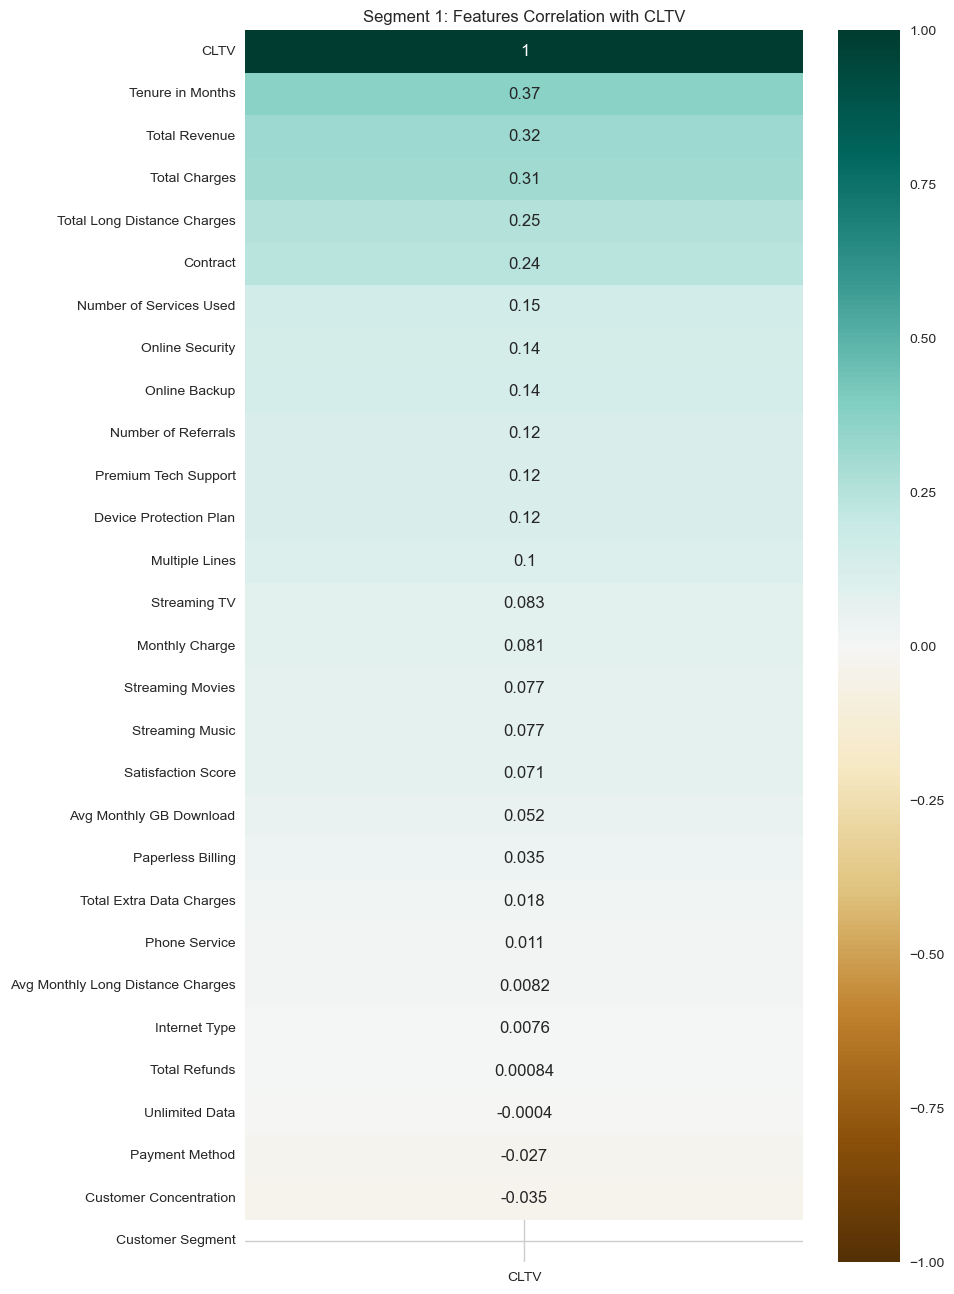

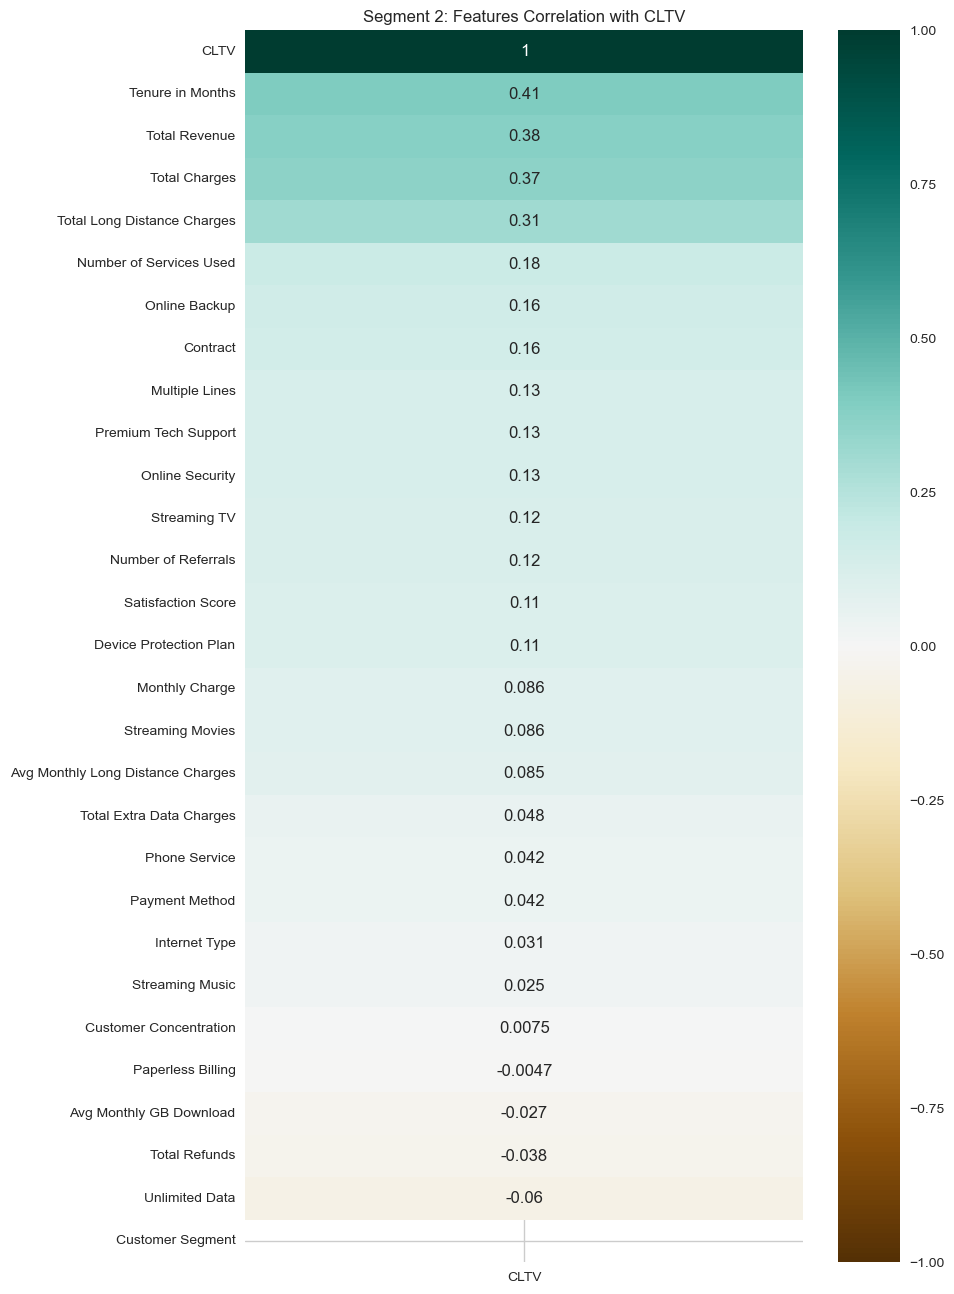

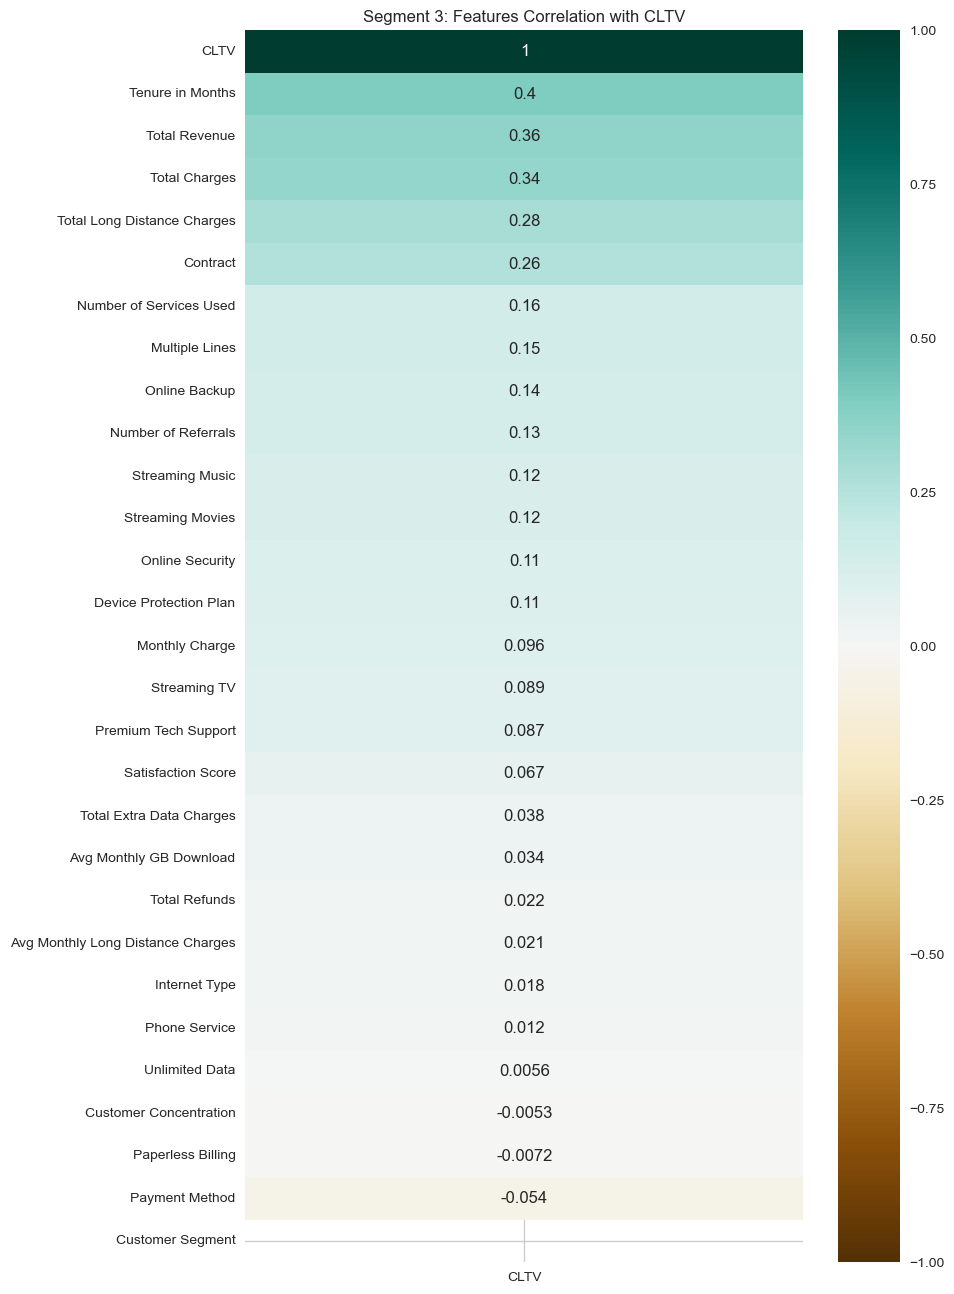

In [175]:
for segment in segments:
    plt.figure(figsize=(9,16))
    feature_churn_rows = df_churn[feature_cols]
    segmentRows = feature_churn_rows[feature_churn_rows["Customer Segment"] == segment]
    
    heatmap = sns.heatmap(segmentRows.corr()[['CLTV']].sort_values(by='CLTV', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(f'Segment {segment}: Features Correlation with CLTV');
    plt.show()

# Correlation of features on Customer Satisfaction by Segments

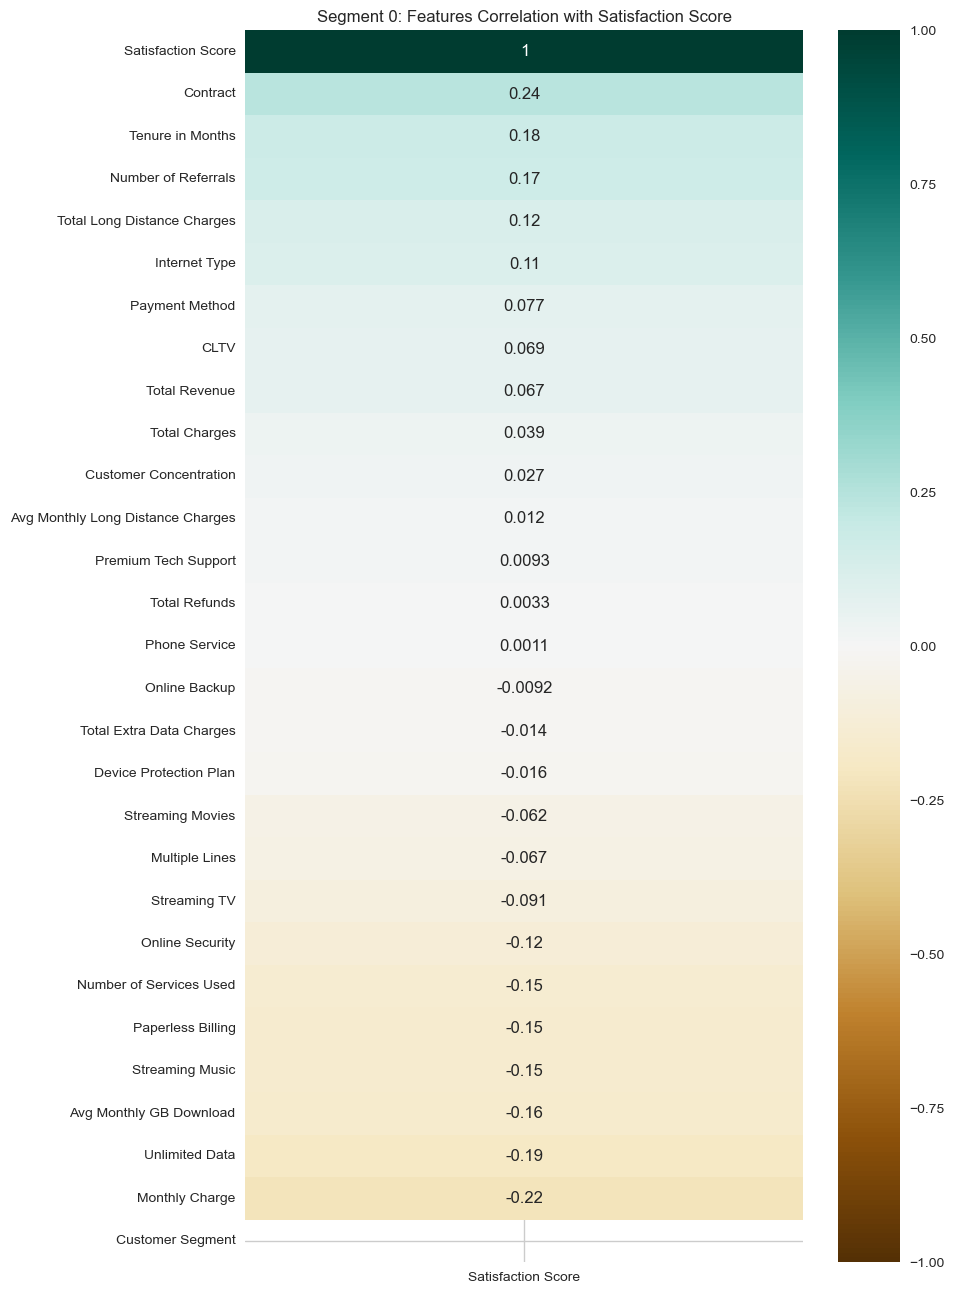

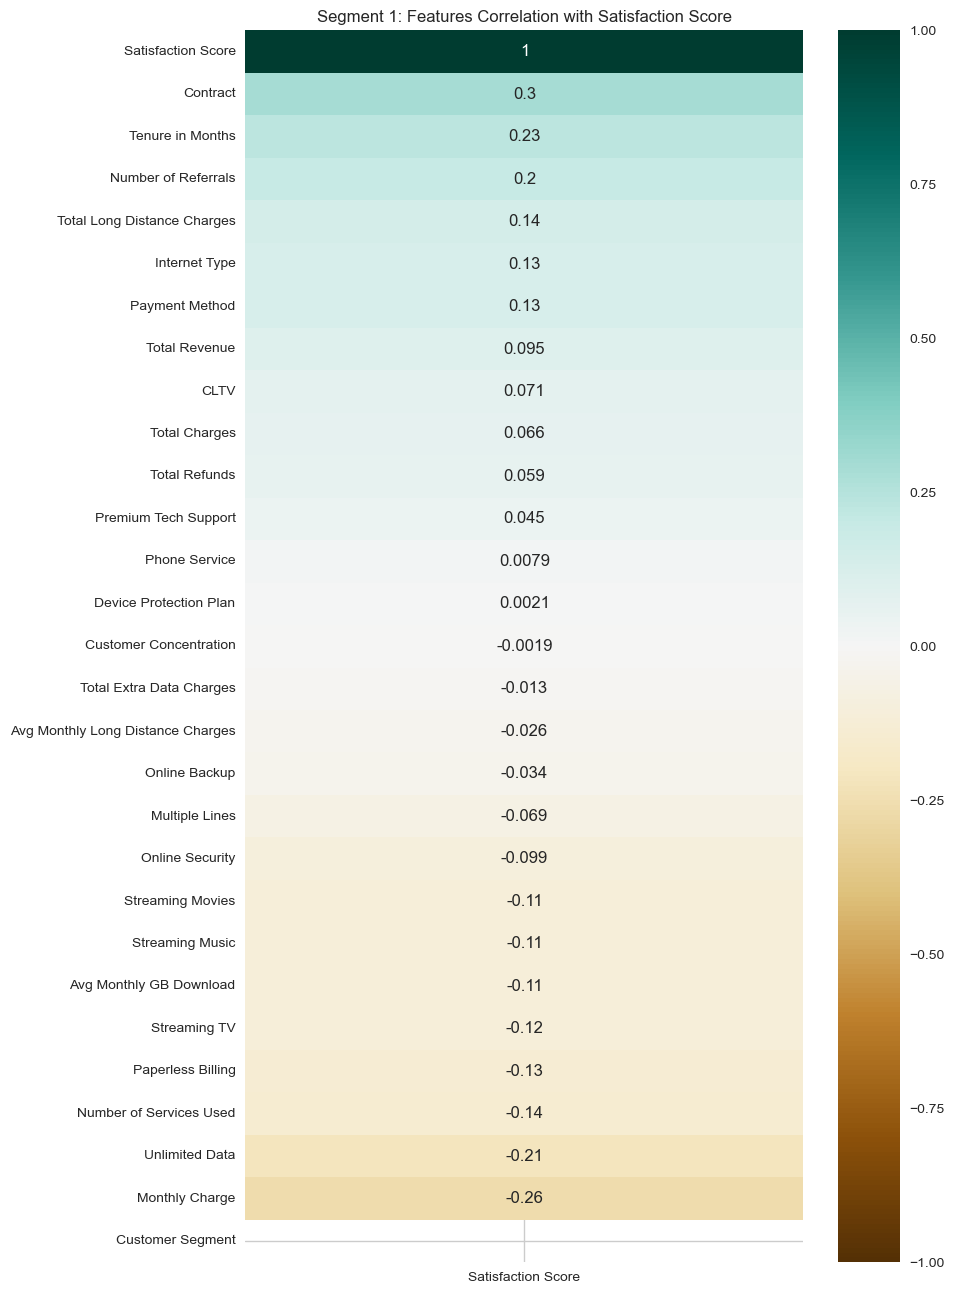

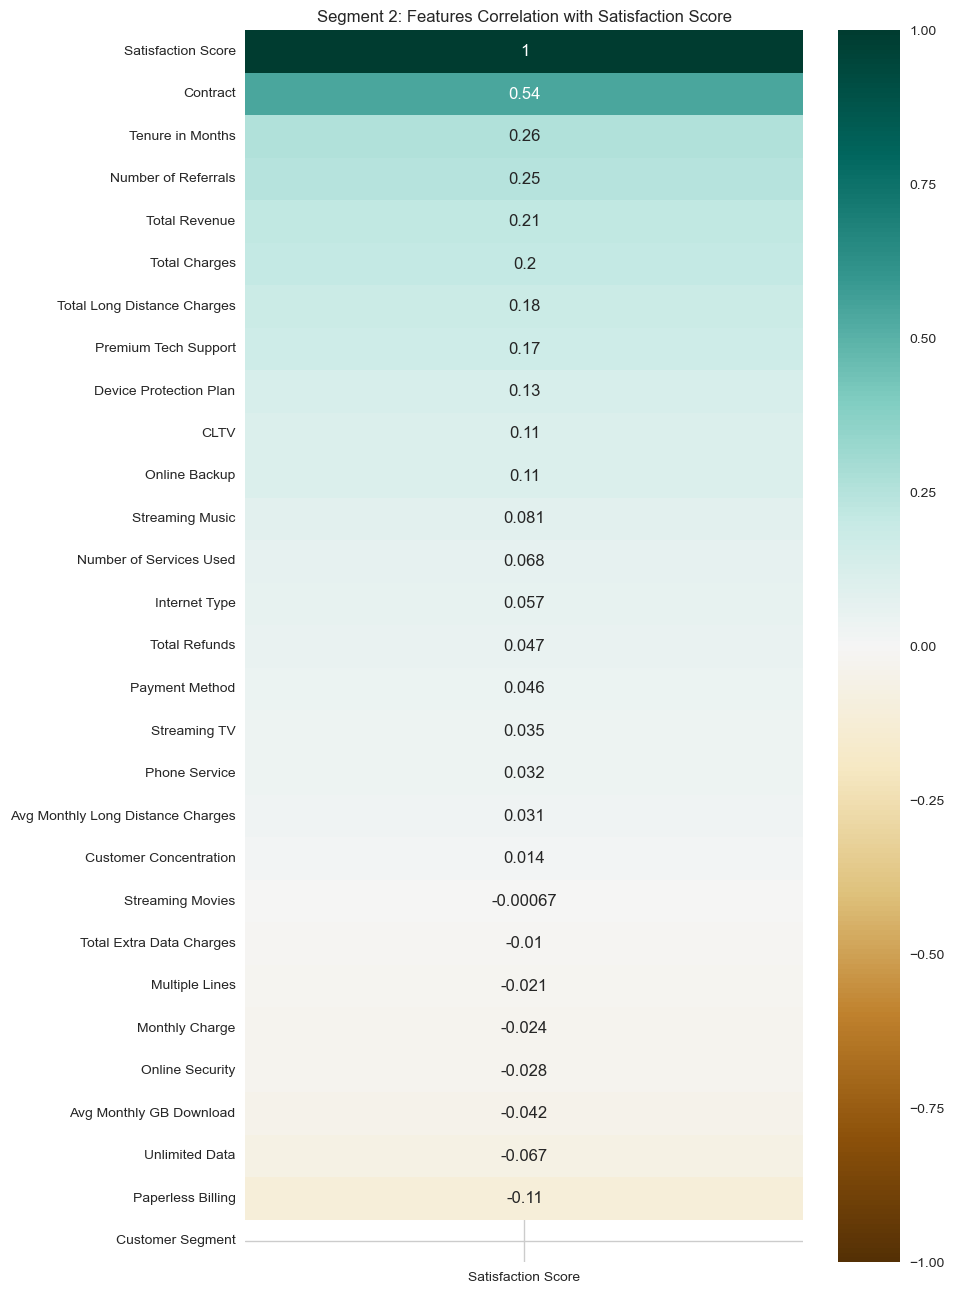

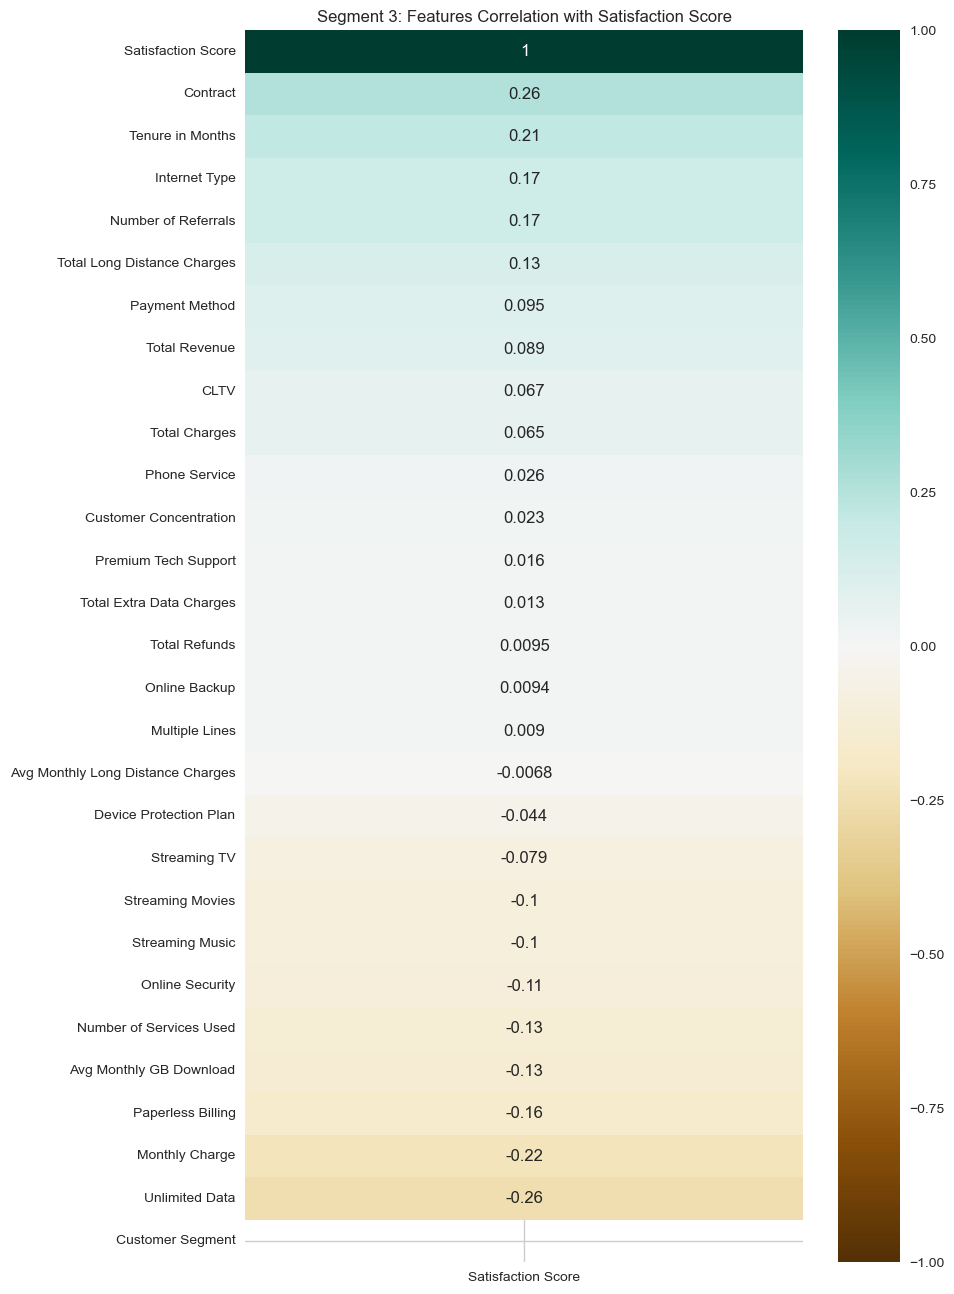

In [177]:
for i, segment in enumerate(segments):
    plt.figure(figsize=(9,16))
    feature_churn_rows = df_churn[feature_cols]
    segmentRows = feature_churn_rows[feature_churn_rows["Customer Segment"] == segment]
    
    heatmap = sns.heatmap(segmentRows.corr()[['Satisfaction Score']].sort_values(by='Satisfaction Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(f'Segment {segment}: Features Correlation with Satisfaction Score');
    plt.savefig(f"images/features-corr-satisfaction{i}", bbox_inches = 'tight')
    plt.show()

# Testing Hypothesis Arised from Correlation Analysis

## Does longer contracts reduces churn?

Null Hypothesis (H0): Contract length has no effect on churn.\
Alterative Hypothesis (H1): Contract length has significant effect on churn.

In [181]:
month_to_month = df_churn[df_churn["Contract"] == 0]
mtm_churn = len(month_to_month[month_to_month["Churn Value"] == 1])
mtm_nochurn = len(month_to_month[month_to_month["Churn Value"] == 0])
print(f"Month-to-Month Contract Churn: {mtm_churn}, No Churn: {mtm_nochurn}")

Month-to-Month Contract Churn: 1655, No Churn: 1955


In [182]:
one_year = df_churn[df_churn["Contract"] == 1]
oy_churn = len(one_year[one_year["Churn Value"] == 1])
oy_nochurn = len(one_year[one_year["Churn Value"] == 0])
print(f"One Year Contract Churn: {oy_churn}, No Churn: {oy_nochurn}")

One Year Contract Churn: 166, No Churn: 1384


In [183]:
two_year = df_churn[df_churn["Contract"] == 2]
ty_churn = len(two_year[two_year["Churn Value"] == 1])
ty_nochurn = len(two_year[two_year["Churn Value"] == 0])
print(f"Two Year Contract Churn: {ty_churn}, No Churn: {ty_nochurn}")

Two Year Contract Churn: 48, No Churn: 1835


In [184]:
from scipy.stats import chi2_contingency

data_to_compare = [
    [mtm_churn, mtm_nochurn],
    [oy_churn, oy_nochurn],
    [ty_churn, ty_nochurn]
]

_, pvalue, _, _ = chi2_contingency(data_to_compare)
print(f"P-value: {pvalue}")

P-value: 0.0


P-value < 0.05. Therefore Alternative Hypothesis (H1), which states that contract length has significant effect on churn is accepted.

Now I will pair-wise compare 3 groups to verify the hypothesis.\
Null Hypothesis (H0): Longer Contract doesn't reduce churn\
Alternative Hypothesis (H1): Longer Contract reduce churn

In [187]:
from statsmodels.stats.proportion import proportions_ztest
import itertools

groups = {
    "Month-to-Month": [mtm_churn, mtm_nochurn],
    "One-Year": [oy_churn, oy_nochurn],
    "Two-Year": [ty_churn, ty_nochurn]
}

# Create all pairwise comparisons
pairs = list(itertools.combinations(groups.keys(), 2))
print(pairs)

alpha = 0.05
corrected_alpha = alpha / len(pairs)

for g1, g2 in pairs:
    count = [groups[g1][0], groups[g2][0]]  # churned counts
    nobs = [sum(groups[g1]), sum(groups[g2])]  # total customers

    stat, pvalue = proportions_ztest(count, nobs)
    
    print(f"{g1} vs {g2}, pvalue = {pvalue}")

[('Month-to-Month', 'One-Year'), ('Month-to-Month', 'Two-Year'), ('One-Year', 'Two-Year')]
Month-to-Month vs One-Year, pvalue = 1.6792107374645592e-129
Month-to-Month vs Two-Year, pvalue = 7.974540200976801e-238
One-Year vs Two-Year, pvalue = 7.427398750015822e-23


All the pvalue < 0.05. Therefore Alternative Hypothesis (H1), which states that longer contract length reduces churn is accepted. 

Null Hypothesis (H0): Contract length has no effect on churn.\
Alternative Hypothesis (H1): Contract length has a significant effect on churn.\
Significance level: 5%\
Month-to-Month vs One-Year, P-value = 1.6792107374645592e-129\
Month-to-Month vs Two-Year, P-value = 7.974540200976801e-238\
One-Year vs Two-Year, P-value = 7.427398750015822e-23\
All the P-value < 0.05. Therefore Alternative Hypothesis (H1), which states that longer contract length reduces churn is accepted.

## Does more service usage reduces churn?

Null Hypothesis (H0): The mean number of services used is the same for both churn and non-churn.\
Alterative Hypothesis (H1): Customers who churn use fewer services on average.

In [192]:
from scipy.stats import ttest_ind

churned = df_churn[df_churn["Churn Value"] == 1]["Number of Services Used"]
not_churned = df_churn[df_churn["Churn Value"] == 0]["Number of Services Used"]

_, pvalue = ttest_ind(churned, not_churned, equal_var=False, alternative='less')

print(f"P-value: {pvalue}")

P-value: 0.9716338965526388


The pvalue > 0.05. Therefore Null Hypothesis (H0), which states that mean number of services used is the same for both churn and non-churn. is accepted.

Null Hypothesis (H0): The mean number of services used is the same for both churn and non-churn.\
Alterative Hypothesis (H1): Customers who churn use fewer services on average.\
Significance level: 5%\
P-value: 0.9716338965526388\
The pvalue > 0.05. Therefore Null Hypothesis (H0), which states that mean number of services used is the same for both churn and non-churn. is accepted.

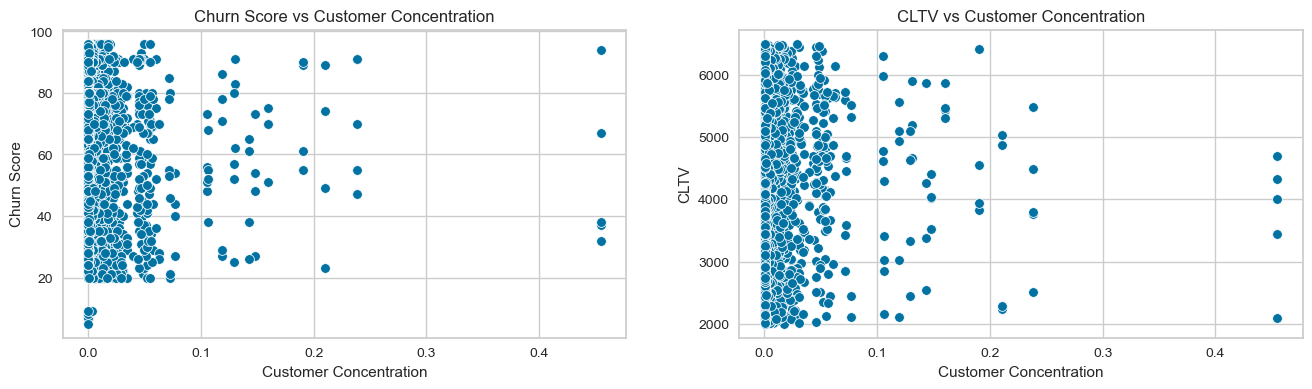

In [195]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(16,4)
sns.scatterplot(x=df_churn["Customer Concentration"], y=df_churn["Churn Score"], ax=axes[0])
axes[0].set_title("Churn Score vs Customer Concentration")
sns.scatterplot(x=df_churn["Customer Concentration"], y=df_churn["CLTV"], ax=axes[1])
axes[1].set_title("CLTV vs Customer Concentration")
plt.show()

There seems to be no relation between Churn and Customer Concentration.

# Distributions & Outlier Analysis

In [198]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer Concentration             7043 non-null   float64
 1   Gender                             7043 non-null   int64  
 2   Age                                7043 non-null   int64  
 3   Senior Citizen                     7043 non-null   int64  
 4   Married                            7043 non-null   int64  
 5   Dependents                         7043 non-null   int64  
 6   Number of Referrals                7043 non-null   int64  
 7   Tenure in Months                   7043 non-null   int64  
 8   Phone Service                      7043 non-null   int64  
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   int64  
 11  Internet Type                      7043 non-null   int64

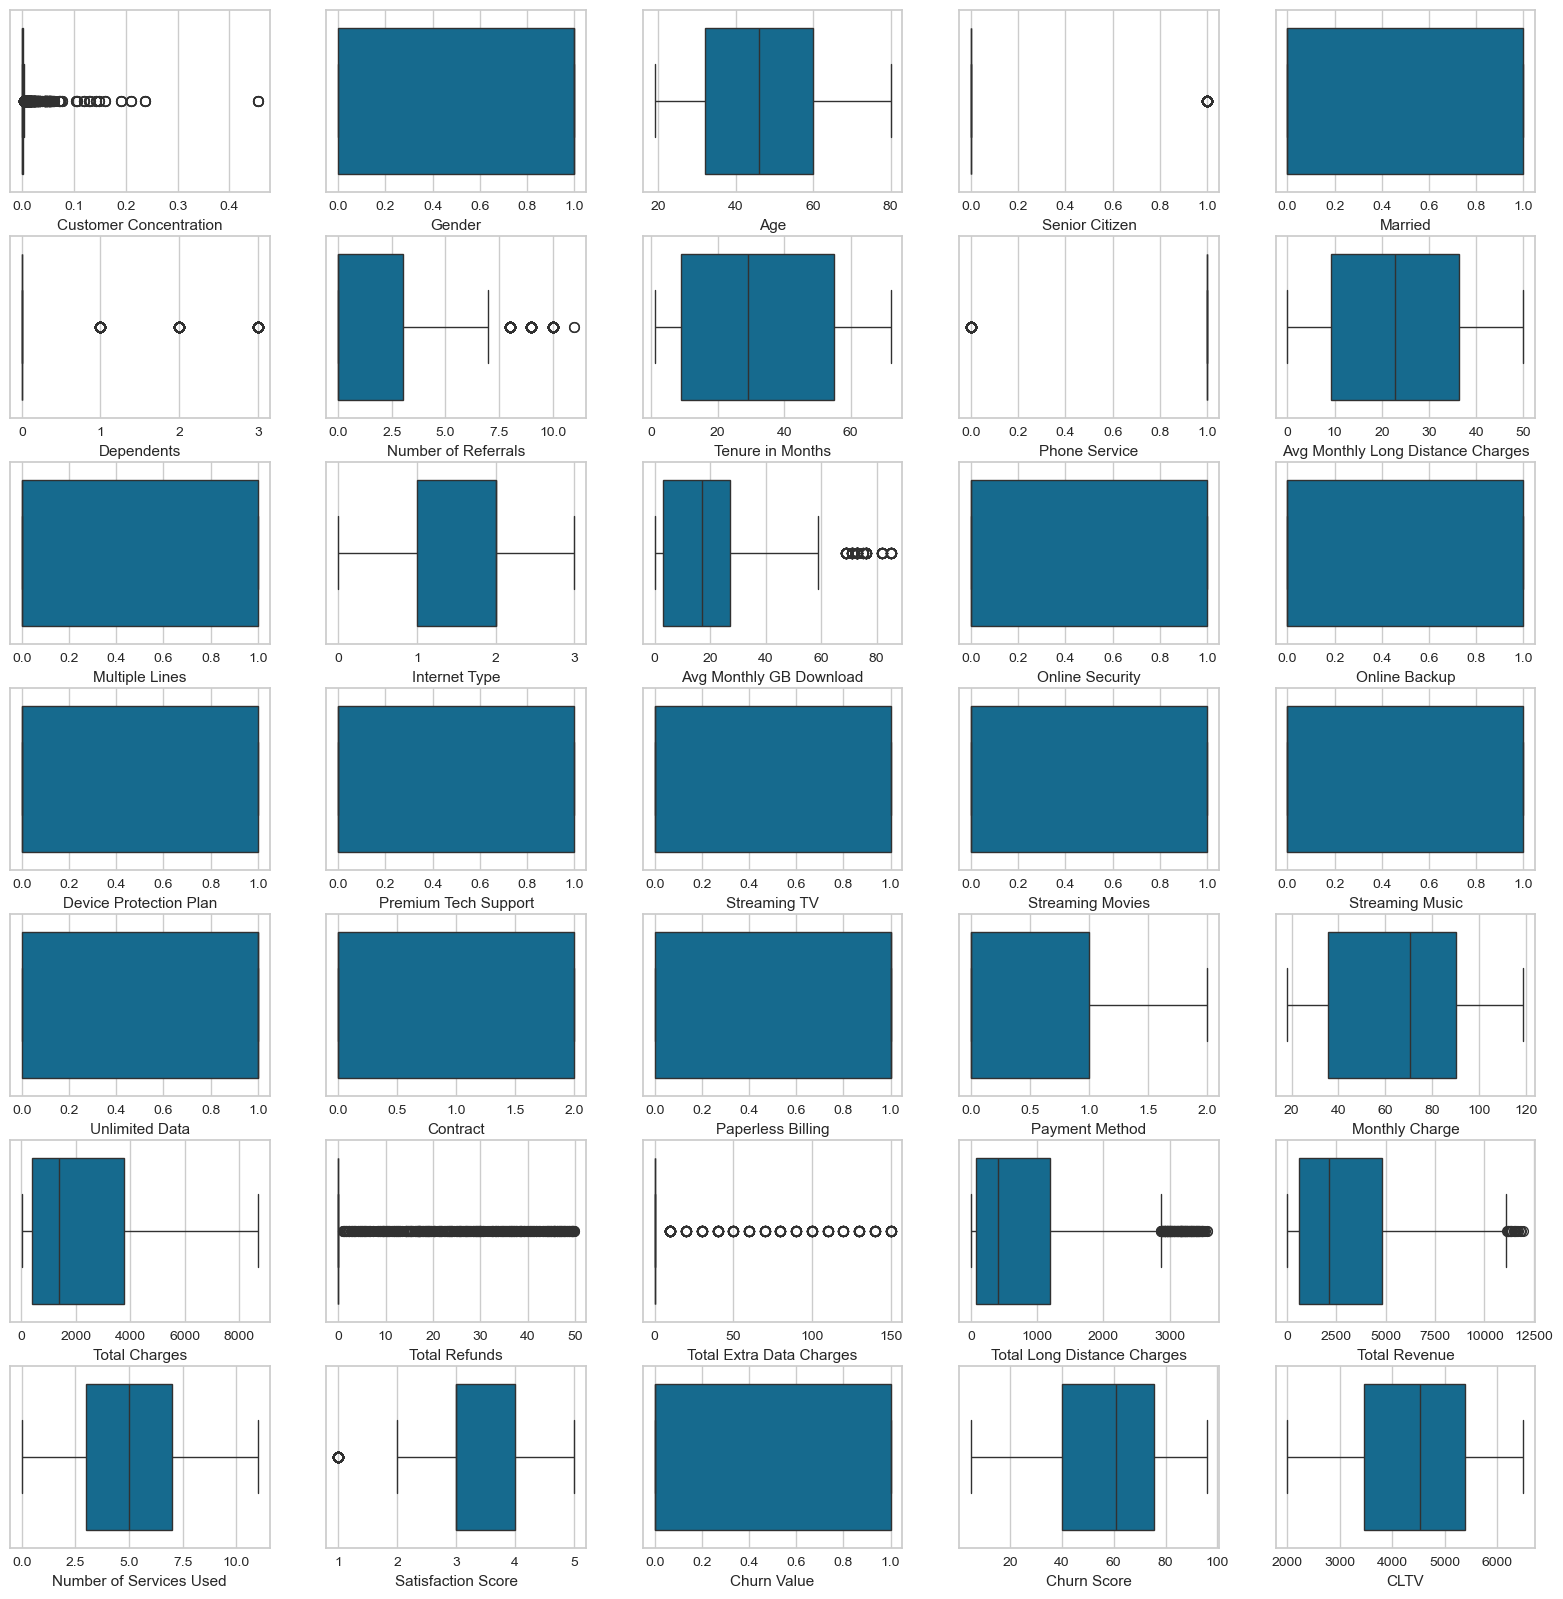

In [199]:
fig, axes = plt.subplots(7, 5)
fig.set_size_inches(16,16)
plt.tight_layout()
cols = [col for col in df_churn.columns if col != "Churn Category" or "Churn Reason"]
for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(x=df_churn[col], ax=ax)

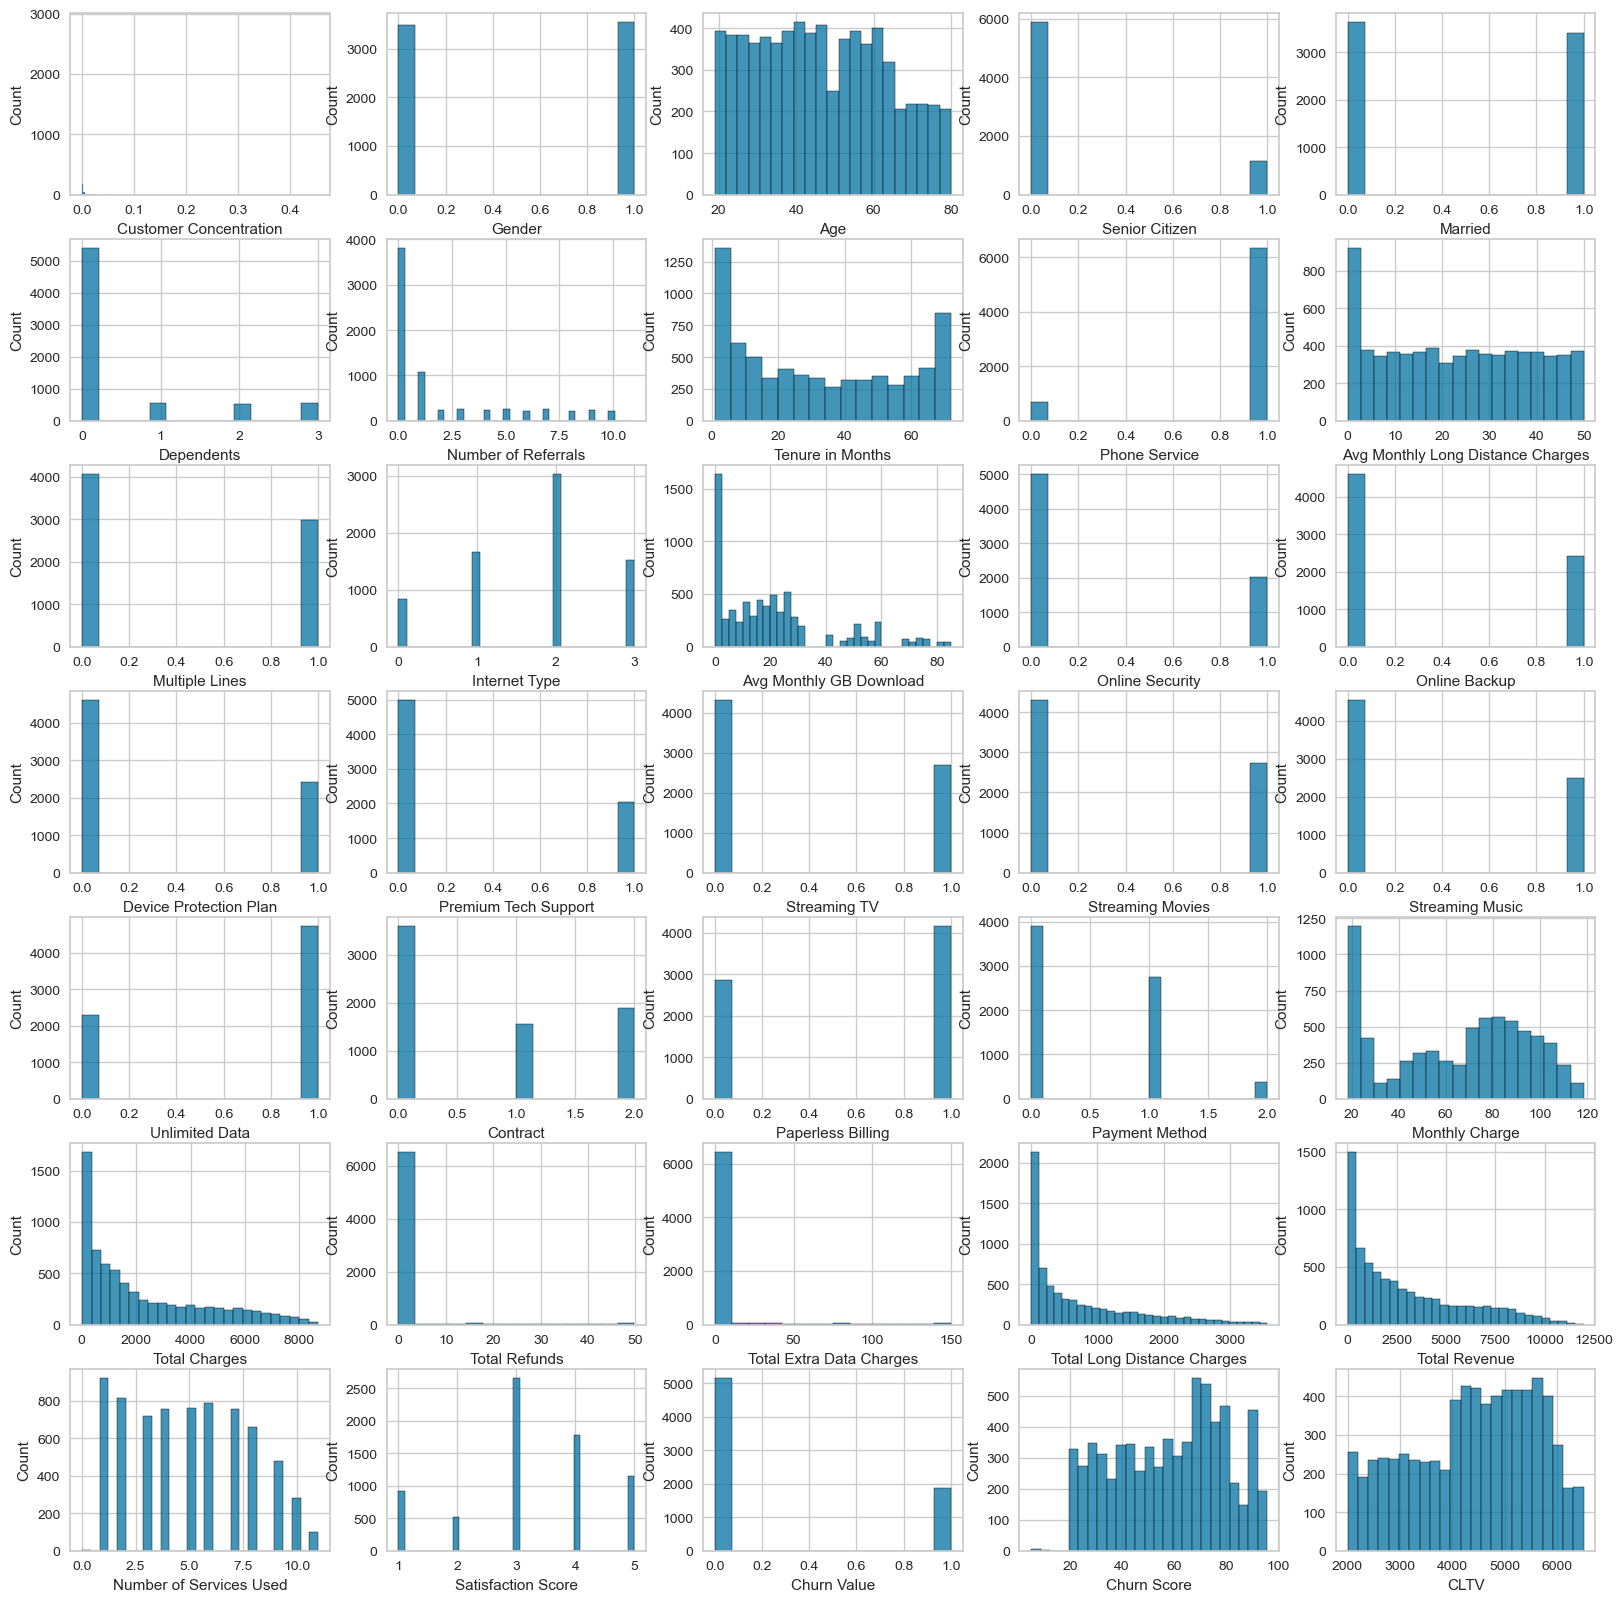

In [200]:
fig, axes = plt.subplots(7, 5)
fig.set_size_inches(16,16)
plt.tight_layout()
cols = [col for col in df_churn.columns if col != "Churn Category" or "Churn Reason"]
for col, ax in zip(cols, axes.flatten()):
    sns.histplot(x=df_churn[col], ax=ax)

# Preprocessing

## Feature Selection

In [203]:
df_churn.columns

Index(['Customer Concentration', 'Gender', 'Age', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Type', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue',
       'Number of Services Used', 'Satisfaction Score', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Customer Segment'],
      dtype='object')

In [204]:
unwanted_columns = [
    'Customer Concentration', # removed according to hypothesis
    # represented all demographic data as customer segment
    'Gender', 
    'Age', 
    'Senior Citizen', 
    'Married',
    'Dependents',
    'Total Refunds', # sparse and have too many outliers
    'Total Extra Data Charges', # sparse and have too many outliers
    'Number of Services Used', # removed according to hypothesis
    'Churn Value', # target variable
    'Churn Score', # another independent variable
    'Churn Category', # is text data and contains missing value
    'Churn Reason' # is text data and contains missing value
]

In [205]:
X = df_churn.drop(columns=unwanted_columns)
y = df_churn["Churn Value"]

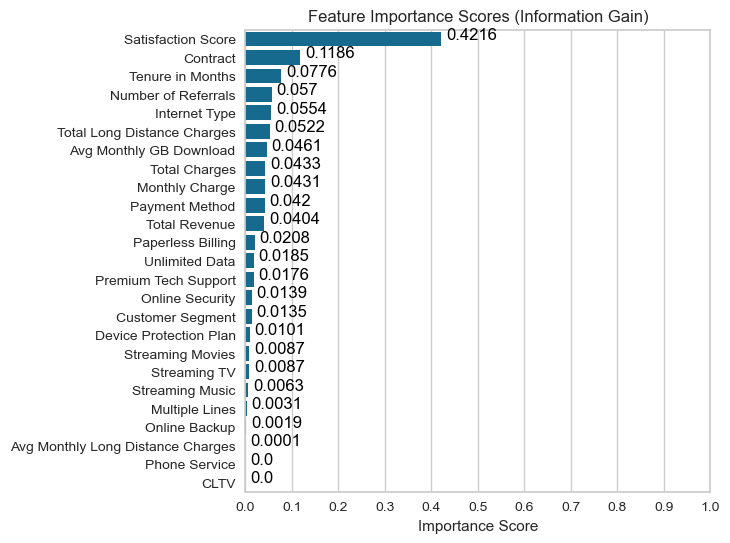

In [206]:
from sklearn.feature_selection import mutual_info_regression

# Apply Information Gain
ig_score = mutual_info_regression(X, y)
ig_feature_scores = dict(zip(X.columns, ig_score))
ig_feature_scores = dict(sorted(ig_feature_scores.items(), key=lambda x: x[1], reverse=True))

# Plot a horizontal bar chart of the feature importance scores
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x=[score for feature, score in ig_feature_scores.items()], 
    y=[feature for feature, score in ig_feature_scores.items()]
)
ax.set_xticks(np.arange(0, 1.05, 0.1))
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in ig_feature_scores.items()]):
    ax.text(v + 0.01, i, str(round(v, 4)), color="black")
plt.savefig("images/feature-importance-information-gain", bbox_inches = 'tight')
plt.show()

In [207]:
low_ig_cols = [
    'Customer Segment',
    'Avg Monthly Long Distance Charges',
    'Multiple Lines',
    'Device Protection Plan',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'CLTV'
]

In [208]:
# pip install git+https://github.com/jundongl/scikit-feature.git

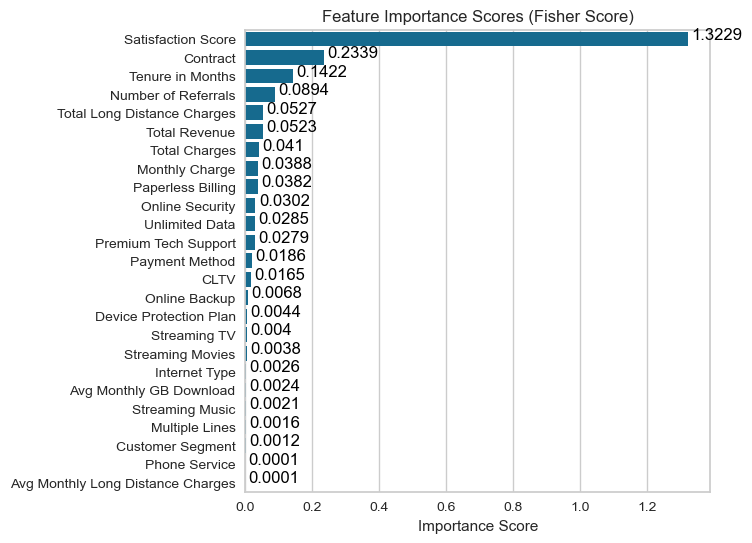

In [209]:
from skfeature.function.similarity_based import fisher_score

# Calculating fisher scores
f_scores = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())
fisher_feature_scores = dict(zip(X.columns, f_scores))
fisher_feature_scores = dict(sorted(fisher_feature_scores.items(), key=lambda item: item[1], reverse=True))

# Plot a horizontal bar chart of the feature importance scores
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x=[score for feature, score in fisher_feature_scores.items()], 
    y=[feature for feature, score in fisher_feature_scores.items()]
)
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Fisher Score)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in fisher_feature_scores.items()]):
    ax.text(v + 0.01, i, str(round(v, 4)), color="black")
plt.savefig("images/feature-importance-fisher-score", bbox_inches = 'tight')
plt.show()

In [210]:
low_fs_cols = [
    'Device Protection Plan',
    'Streaming TV',
    'Streaming Movies',
    'Internet Type',
    'Avg Monthly GB Download',
    'Streaming Music',
    'Multiple Lines',
    'Customer Segment',
    'Phone Service',
    'Avg Monthly Long Distance Charges'
]

In [211]:
# columns present in both low lists

from collections import Counter

low_importance_features = list((Counter(low_ig_cols) & Counter(low_fs_cols)).elements())
print(low_importance_features)

['Customer Segment', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Device Protection Plan', 'Streaming TV', 'Streaming Movies', 'Streaming Music']


In [212]:
X = X.drop(columns=low_importance_features)

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 18), (2113, 18), (4930,), (2113,))

# Feature Scaling

In [215]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [216]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

Number of Referrals  Tenure in Months  Phone Service  Internet Type  \
0                  0.0          0.154930            1.0       0.333333   
1                  0.0          0.056338            0.0       0.333333   
2                  0.0          0.112676            1.0       0.333333   
3                  0.0          0.985915            1.0       0.666667   
4                  0.0          0.070423            1.0       0.666667   

   Avg Monthly GB Download  Online Security  Online Backup  \
0                 0.141176              0.0            1.0   
1                 0.694118              0.0            1.0   
2                 0.023529              0.0            0.0   
3                 0.152941              0.0            1.0   
4                 0.105882              0.0            0.0   

   Premium Tech Support  Unlimited Data  Contract  Paperless Billing  \
0                   0.0             1.0       0.0                1.0   
1                   0.0             1.0       0.0                1.0   
2                   0.0             1.0       0.0                0.0   
3                   0.0             1.0       1.0                1.0   
4                   0.0             1.0       0.0                1.0   

   Payment Method  Monthly Charge  Total Charges  Total Long Distance Charges  \
0             0.0        0.306468       0.066259                     0.150744   
1             1.0        0.325871       0.033130                     0.000000   
2             0.0        0.267662       0.045881                     0.039436   
3             0.5        0.809950       0.799947                     0.684362   
4             0.5        0.553234       0.044132                     0.046607   

   Total Revenue  Satisfaction Score      CLTV  
0       0.090239                1.00  0.498332  
1       0.023740                0.25  0.584167  
2       0.044739                0.00  0.390038  
3       0.783231                0.75  0.497665  
4       0.045609                0.75  0.492995

# Dimensionality Reduction

In [218]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
evr = pca.explained_variance_ratio_
print(f"Total components: {len(evr)}\nExplained variance ratios:\n{evr}")

Total components: 18
Explained variance ratios:
[2.72697946e-01 1.71831487e-01 1.03100807e-01 7.02411925e-02
 6.14488613e-02 5.66272941e-02 5.15022474e-02 3.72261449e-02
 3.45487460e-02 3.03076934e-02 2.86185357e-02 2.26922981e-02
 2.05247334e-02 1.67538333e-02 1.15198335e-02 7.87498045e-03
 2.48269395e-03 6.72816012e-07]


In [219]:
cumsum_evr = np.cumsum(evr)
print(f"Cumulative sum of explained variance rato:\n{cumsum_evr}")

Cumulative sum of explained variance rato:
[0.27269795 0.44452943 0.54763024 0.61787143 0.67932029 0.73594759
 0.78744983 0.82467598 0.85922473 0.88953242 0.91815095 0.94084325
 0.96136799 0.97812182 0.98964165 0.99751663 0.99999933 1.        ]


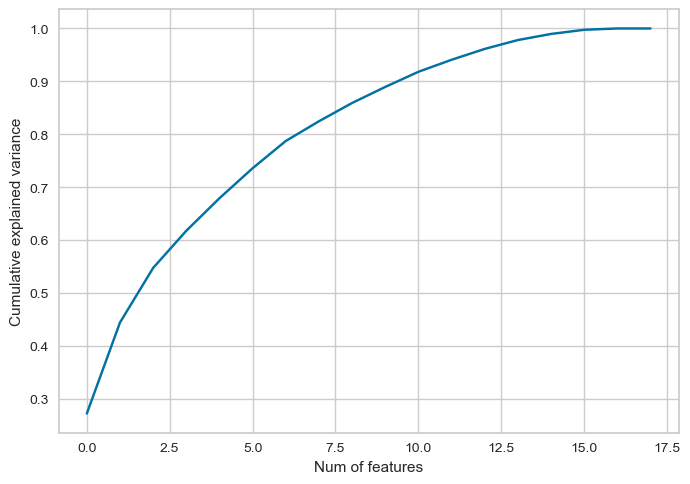

In [220]:
ax = plt.plot(cumsum_evr)
plt.xlabel("Num of features")
plt.ylabel("Cumulative explained variance")
plt.grid
plt.savefig("images/pca-graph", bbox_inches = 'tight')
plt.show()

In [221]:
n_component_99 = np.argmax(cumsum_evr >= 0.99) + 1
print(f"Number of components: {n_component_99}")

Number of components: 16


In [222]:
pca = PCA(n_components=n_component_99)
X_train = pca.fit_transform(X_train)
X_train

array([[-0.07734649, -0.67586839,  0.25499277, ..., -0.32538004,
        -0.15028368, -0.02363779],
       [-0.11937316, -0.90986581, -0.21693311, ...,  0.40189398,
        -0.1409489 ,  0.20620186],
       [-0.72200002, -0.42752228, -0.56791487, ..., -0.34983026,
        -0.00333672, -0.1118814 ],
       ...,
       [ 0.80892099, -0.68280732, -0.43356097, ...,  0.13204116,
        -0.2440885 , -0.12824639],
       [ 0.62652785, -0.3762637 ,  0.06581726, ..., -0.29520169,
        -0.05323533,  0.06193977],
       [-0.08057589, -0.2389669 ,  0.52316295, ...,  0.06075387,
         0.39351753, -0.03635589]])

In [223]:
columns = [f"C{index}" for index in range(0, n_component_99)]
print(columns)

['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']


In [224]:
X_train = pd.DataFrame(data=X_train, columns=columns)
X_train.head()

C0        C1        C2        C3        C4        C5        C6  \
0 -0.077346 -0.675868  0.254993  0.577537  0.377637  0.196432 -0.221366   
1 -0.119373 -0.909866 -0.216933  0.429810  0.598443  0.693177 -0.512890   
2 -0.722000 -0.427522 -0.567915  0.275390 -0.273491 -0.423126  0.019777   
3  0.894244  0.286273  0.888942  0.471140  0.029531 -0.160443 -0.338446   
4 -0.579553 -0.652967  0.200744 -0.141280  0.013947 -0.130087 -0.116826   

         C7        C8        C9       C10       C11       C12       C13  \
0  0.059545  0.102893 -0.379763  0.380304  0.188762 -0.054801 -0.325380   
1  0.208641 -0.483575  0.638234  0.024010 -0.093457  0.143567  0.401894   
2 -0.280806 -0.137288  0.094550 -0.314960  0.057213 -0.051005 -0.349830   
3  0.216979 -0.636743 -0.078974  0.088279 -0.278190 -0.085511 -0.033715   
4  0.387817 -0.154475 -0.092267  0.236648  0.127572 -0.144470  0.027393   

        C14       C15  
0 -0.150284 -0.023638  
1 -0.140949  0.206202  
2 -0.003337 -0.111881  
3  0.076537  0.125073  
4  0.082890  0.059457

In [225]:
def reduce_dimension(X):
    X = pca.transform(X)
    return pd.DataFrame(data=X, columns=columns)

# Class Balancing

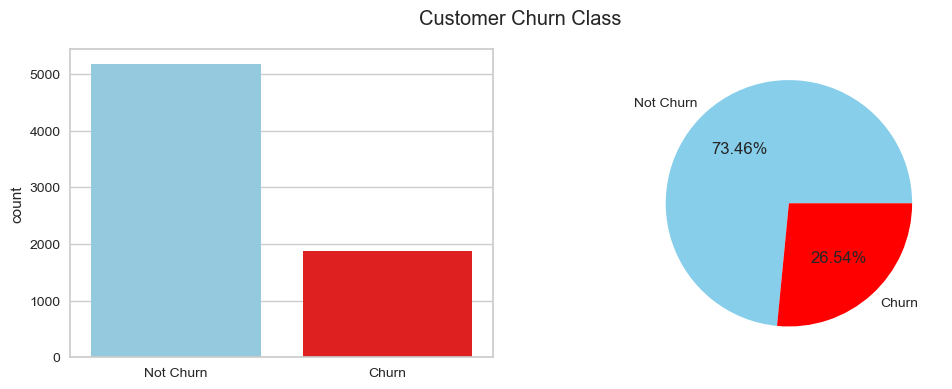

In [227]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
fig.suptitle("Customer Churn Class")
sns.barplot(x=["Not Churn", "Churn"], y=y.value_counts(), palette=["skyblue","red"], ax=axes[0])
axes[1].pie(x=y.value_counts(), labels=["Not Churn", "Churn"],
        autopct=lambda percent: "{:.2f}%".format(percent),
        colors=["skyblue","red"])
fig.savefig("images/class-distribution", bbox_inches = 'tight')
plt.show()

In [228]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(y_train))
# Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 3622, 1: 1308})
Resampled dataset shape Counter({0: 3622, 1: 3622})


# Model Training

In [230]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [231]:
models = []
models.append(('LR', LogisticRegression(random_state=28)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state=28)))
models.append(('XGB', XGBRFClassifier(random_state=28)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [232]:
train_accuracy_results = []
train_f1_results = []
test_accuracy_results = []
test_f1_results = []
names = []
results = []

scoring = {'accuracy' : 'accuracy', 'f1_score' : 'f1'}

for name, model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    train_accuracy, train_f1, test_accuracy, test_f1 = cv_results["train_accuracy"], cv_results["train_f1_score"], cv_results["test_accuracy"], cv_results["test_f1_score"]
    train_accuracy_results.append(train_accuracy)
    train_f1_results.append(train_f1)
    test_accuracy_results.append(test_accuracy)
    test_f1_results.append(test_f1)
    names.append(name)
    results.append([name, train_accuracy.mean(), train_f1.mean(), test_accuracy.mean(), test_f1.mean()])
    print('%s: training accuracy: %f, training f1-score: %f, testing accuracy: %f, testing f1-score: %f' % (name, train_accuracy.mean(), train_f1.mean(), test_accuracy.mean(), test_f1.mean()))

LR: training accuracy: 0.953720, training f1-score: 0.954000, testing accuracy: 0.952235, testing f1-score: 0.952479
KNN: training accuracy: 0.951477, training f1-score: 0.952844, testing accuracy: 0.927803, testing f1-score: 0.930462
RF: training accuracy: 1.000000, training f1-score: 1.000000, testing accuracy: 0.963143, testing f1-score: 0.963012
XGB: training accuracy: 0.950614, training f1-score: 0.951058, testing accuracy: 0.930426, testing f1-score: 0.930831
NB: training accuracy: 0.908511, training f1-score: 0.906275, testing accuracy: 0.907787, testing f1-score: 0.905233
SVM: training accuracy: 0.954652, training f1-score: 0.955036, testing accuracy: 0.952374, testing f1-score: 0.952809


In [233]:
cv_result = pd.DataFrame(data=results, columns=["Name", "Training Accuracy", "Training F1", "Testing Accuracy", "Testing F1"])
cv_result = cv_result.set_index("Name")
cv_result

Training Accuracy  Training F1  Testing Accuracy  Testing F1
Name                                                              
LR             0.953720     0.954000          0.952235    0.952479
KNN            0.951477     0.952844          0.927803    0.930462
RF             1.000000     1.000000          0.963143    0.963012
XGB            0.950614     0.951058          0.930426    0.930831
NB             0.908511     0.906275          0.907787    0.905233
SVM            0.954652     0.955036          0.952374    0.952809

In [234]:
X_test = scaler.transform(X_test)
X_test = reduce_dimension(X_test)

In [235]:
for name, model in models:
    model.fit(X_train, y_train)    
    y_predict = model.predict(X_test)
    print('%s: accuracy: %f, f1-score: %f' % (name, accuracy_score(y_test, y_predict), f1_score(y_test, y_predict)))

LR: accuracy: 0.946048, f1-score: 0.901724
KNN: accuracy: 0.901088, f1-score: 0.827700
RF: accuracy: 0.930904, f1-score: 0.867993
XGB: accuracy: 0.914813, f1-score: 0.848485
NB: accuracy: 0.914340, f1-score: 0.841367
SVM: accuracy: 0.943682, f1-score: 0.898551


# Hyperparameter Tuning

In [237]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set up parameter grids for each model
param_grid = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C' : [0.05, 0.1],
        'solver': ['lbfgs','newton-cg','liblinear','sag','saga']
    }, 
    'Random Forest': {
        'n_estimators': [50, 100, 200], 
        'max_depth': [None, 2, 4, 6],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 3, 5],
    },
    'SVM': {
        'degree': [1, 3, 5],
        'C': [0.1, 1, 5],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    }
}

In [238]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=28),
    "Random Forest": RandomForestClassifier(random_state=28),
    "SVM": SVC(max_iter=10000, random_state=28)
}

# Store results
results = []

# Grid Search for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='f1', n_jobs = -1,verbose = 1)  # 5-fold CV for R²
    grid_search.fit(X_train, y_train)
    
    # Best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Store results
    results.append([name, best_params, best_score])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Best Parameters", "Best CV F1 Score"])
print("\nBest Hyperparameters and Scores from Grid Search:")
print(results)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=No

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (m


Best Hyperparameters and Scores from Grid Search:
[['Logistic Regression', {'C': 0.05, 'penalty': None, 'solver': 'saga'}, 0.9546661520373313], ['Random Forest', {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}, 0.96346255068961], ['SVM', {'C': 5, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}, 0.9588231355480984]]


In [239]:
results_df

Model                                    Best Parameters  \
0  Logistic Regression     {'C': 0.05, 'penalty': None, 'solver': 'saga'}   
1        Random Forest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
2                  SVM  {'C': 5, 'degree': 5, 'gamma': 'scale', 'kerne...   

   Best CV F1 Score  
0          0.954666  
1          0.963463  
2          0.958823

|  |  |  |
| --- | --- | --- |
| **Model** | **Best Parameters** | **Best CV F1 Score** |
| Logistic Regression | {'C': 0.05, 'penalty': None, 'solver': 'saga'} | 0.9546 |
| Random Forest | {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100} | 0.9634 |
| SVM | {'C': 5, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'} | 0.9588 |

#### Model Evaluation

In [438]:
models = {
    "Logistic Regression": LogisticRegression(C=0.05, class_weight=None, penalty=None, solver='saga', random_state=28),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, random_state=28),
    "SVM": SVC(C=5, degree=5, gamma='scale', kernel='poly', random_state=28)
}

In [466]:
from sklearn.metrics import precision_score, recall_score

In [472]:
test_results = []
cm_results = []

for name, model in models.items():
    model.fit(X_train, y_train)    
    y_predict = model.predict(X_test)
    test_results.append([name, precision_score(y_test, y_predict), recall_score(y_test, y_predict), f1_score(y_test, y_predict), accuracy_score(y_test, y_predict)])
    print('%s: accuracy: %f, f1-score: %f' % (name, accuracy_score(y_test, y_predict), f1_score(y_test, y_predict)))
    print(classification_report(y_test, y_predict))
    cm_results.append([name, confusion_matrix(y_test, y_predict)])

Logistic Regression: accuracy: 0.946048, f1-score: 0.901724
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1552
           1       0.87      0.93      0.90       561

    accuracy                           0.95      2113
   macro avg       0.92      0.94      0.93      2113
weighted avg       0.95      0.95      0.95      2113

Random Forest: accuracy: 0.930904, f1-score: 0.867993
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1552
           1       0.88      0.86      0.87       561

    accuracy                           0.93      2113
   macro avg       0.91      0.91      0.91      2113
weighted avg       0.93      0.93      0.93      2113

SVM: accuracy: 0.947468, f1-score: 0.902717
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1552
           1       0.89      0.92      0.90       561

    accuracy            

In [474]:
test_results = pd.DataFrame(test_results, columns=["Model", "Precision", "Recall", "F1-Score", "Accuracy"])
test_results

Model  Precision    Recall  F1-Score  Accuracy
0  Logistic Regression   0.873122  0.932264  0.901724  0.946048
1        Random Forest   0.880734  0.855615  0.867993  0.930904
2                  SVM   0.887931  0.918004  0.902717  0.947468

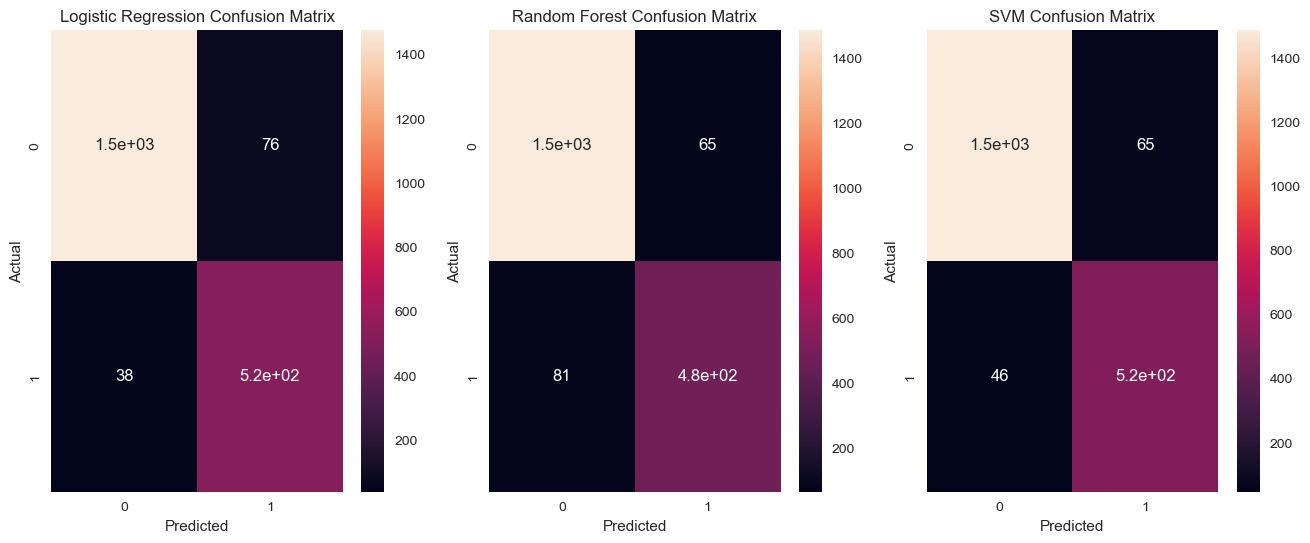

In [498]:
plt.figure(figsize=(16,6))
for i, pair in enumerate(cm_results):
    name, cm = pair
    plt.subplot(130+i+1)
    sns.heatmap(cm, annot=True)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.savefig("images/confusion-matrix", bbox_inches = 'tight')

In [500]:
lr = LogisticRegression(C=0.05, class_weight=None, penalty=None, solver='saga', random_state=28)
lr.fit(X_train, y_train)

LogisticRegression(C=0.05, penalty=None, random_state=28, solver='saga')

In [535]:
y_pred = lr.predict(X_test)
X_test_arr = X_test.to_numpy()
y_test_arr = y_test.to_numpy()
false_neg_churn = [X_test_arr[i] for i in range(len(y_pred)) if y_pred[i] == 0 and y_test_arr[i] == 1]
false_neg_churn = pca.inverse_transform(false_neg_churn)
false_neg_churn = pd.DataFrame(false_neg_churn, columns=X.columns)
false_neg_churn

4461    0
5119    0
1918    1
1471    1
1252    1
       ..
4191    0
6434    0
3167    0
113     1
269     1
Name: Churn Value, Length: 2113, dtype: int64


KeyError: 0